In [24]:
%pylab inline
import matplotlib as mpl
#mpl.use("agg")
#Import rest
import subprocess, os, sys, pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as plab
import matplotlib.font_manager as font_manager
import re
import pandas_custom_mask
from numpy import median
#import ipystata
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


C:\Users\gebruiker\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['box']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
project = "4. Data and Methods"
workdir = re.sub("(?<=%s)[\w\W]*" % project, "", os.getcwd())
os.chdir(workdir)
os.chdir(workdir)
print (workdir)

C:\Users\gebruiker\Dropbox\Research\Projects\4. Single Author\4. Data and Methods


In [26]:
data1 = pd.read_excel(r"3. Output\modified dataset.xlsx", na_values=["."])
#data2 = pd.read_excel(r"3. Output\modified dataset average.xlsx", na_values=["."])

In [27]:
dataPrin=data1.con('Principal', '==', 1)
dataPrinEarly=dataPrin.con('Timing of Changes', '==', 'Earlier Changes')
dataPrinLate=dataPrin.con('Timing of Changes', '==', 'Later Changes')
dataPrinAP=dataPrin.con('More Timing', '==', 'Earlier Changes')
dataPrinBP=dataPrin.con('More Timing', '==', 'Later Changes')
dataAgent=data1.con('Agent', '==', 1)
dataPrinLH=dataPrin.con('Treatment', '==', 'Low-to-High')
dataPrinHL=dataPrin.con('Treatment', '==', 'High-to-Low')

dataPrinSel=dataPrin.con('selection', '==', 1)
dataPrinEarlySel=dataPrinEarly.con('selection', '==', 1)
dataPrinLateSel=dataPrinLate.con('selection', '==', 1)
dataPrinLHSel=dataPrinLH.con('selection', '==', 1)
dataPrinHLSel=dataPrinLH.con('selection', '==', 1)

In [28]:
sns.set_style("white")
#Check fonts
font_paths = mpl.font_manager.findSystemFonts()
font_objects = mpl.font_manager.createFontList(font_paths)
font_names = [f.name for f in font_objects]
print (font_names)
sns.set(font=mpl.rcParams['font.family'], style="white", font_scale=1.8);
color_cluster=sns.color_palette("RdBu_r", 7)

['Gill Sans Ultra Bold Condensed', 'Cambria', 'Forte', 'Poor Richard', 'Microsoft New Tai Lue', 'Dubai', 'Nirmala UI', 'Constantia', 'Felix Titling', 'Rockwell Condensed', 'Garamond', 'ZWAdobeF', 'Impact', 'Perpetua Titling MT', 'Lucida Sans', 'Perpetua', 'Segoe UI Emoji', 'Gill Sans MT', 'Segoe Print', 'ScalaSans-Italic', 'Nirmala UI', 'Century', 'Segoe Print', 'Book Antiqua', 'Segoe UI', 'Bodoni MT', 'Lucida Fax', 'Calisto MT', 'Yu Gothic', 'Showcard Gothic', 'Berlin Sans FB', 'Candara', 'Microsoft PhagsPa', 'Trebuchet MS', 'Arial', 'Calisto MT', 'Arial', 'Microsoft JhengHei', 'Bodoni MT', 'Gadugi', 'Wingdings 3', 'Century Gothic', 'Georgia', 'Informal Roman', 'Elephant', 'Ink Free', 'Comic Sans MS', 'Ebrima', 'Candara', 'Bodoni MT', 'Calibri', 'Sylfaen', 'Tw Cen MT Condensed Extra Bold', 'Harlow Solid Italic', 'Sitka Small', 'Leelawadee UI', 'Leelawadee UI', 'ScalaSans-BoldItalic', 'Yu Gothic', 'Sitka Small', 'Book Antiqua', 'Courier New', 'Segoe UI', 'Palace Script MT', 'Bernard MT

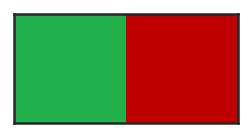

In [29]:
flatui = ["#22b14c", "#c00000"]
#palette=sns.palplot(sns.color_palette("RdBu_r", n_colors=7))
palette=sns.palplot(sns.color_palette(flatui, n_colors=2))

# Graphs

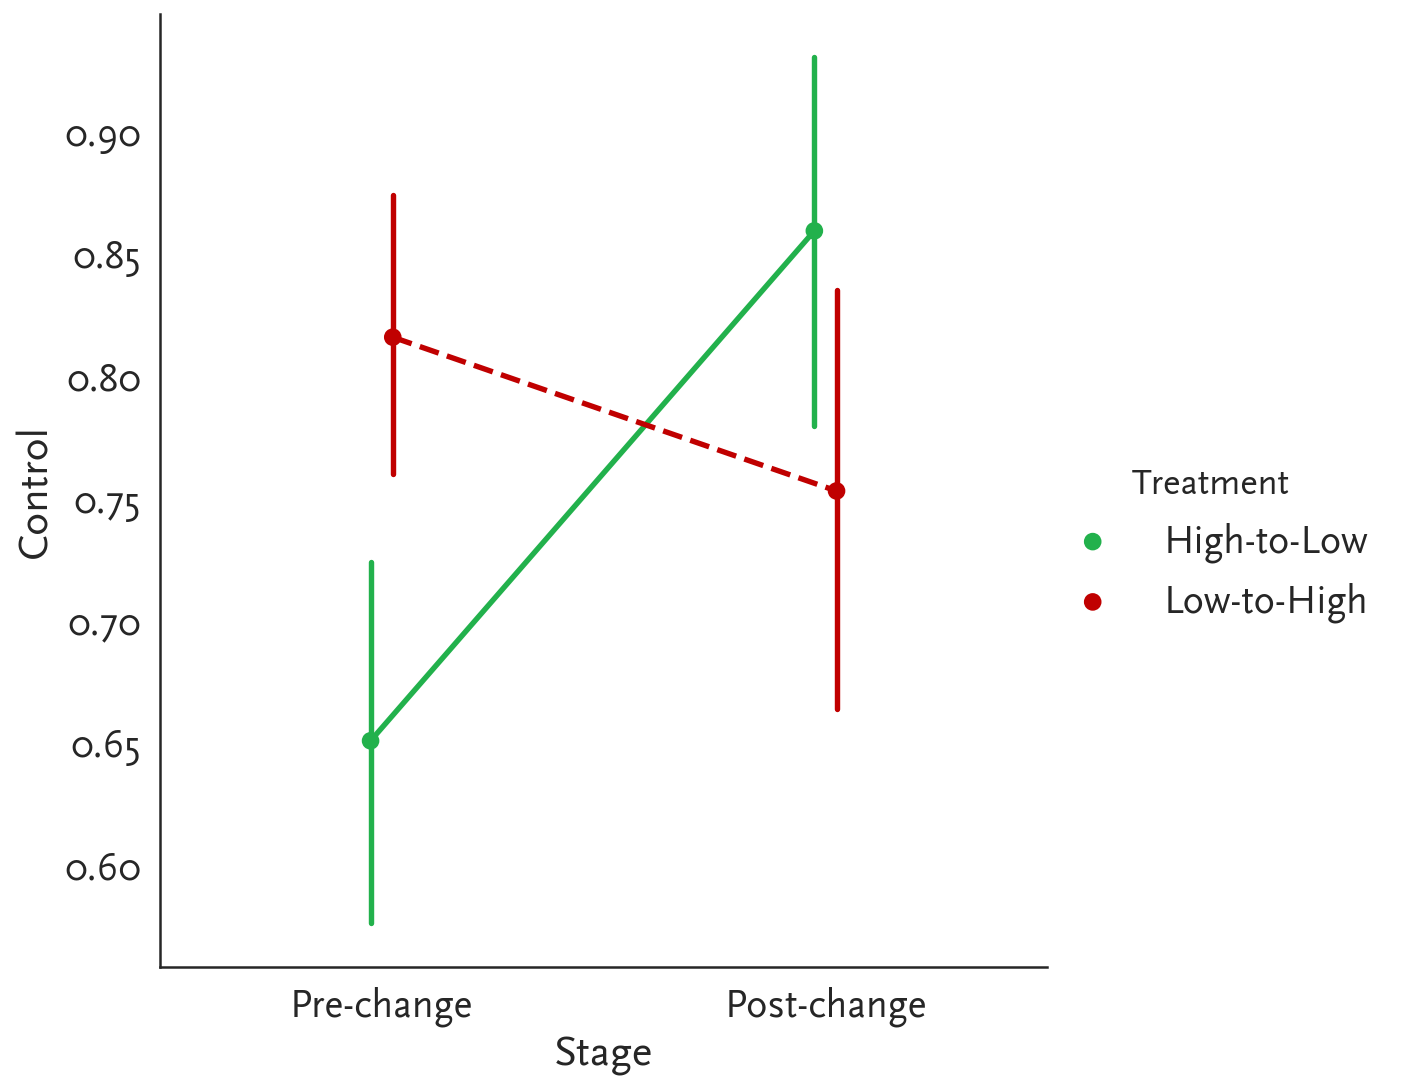

In [30]:
sns.set(font=['ScalaSans'], style="white", font_scale=1.8);
sns.catplot("Stage", "Control", "Treatment", dataPrin, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, units="group(participantcode)", ci=95);
plt.savefig(r"3. Output\Figure 3 Scala Sans.png", dpi=600)

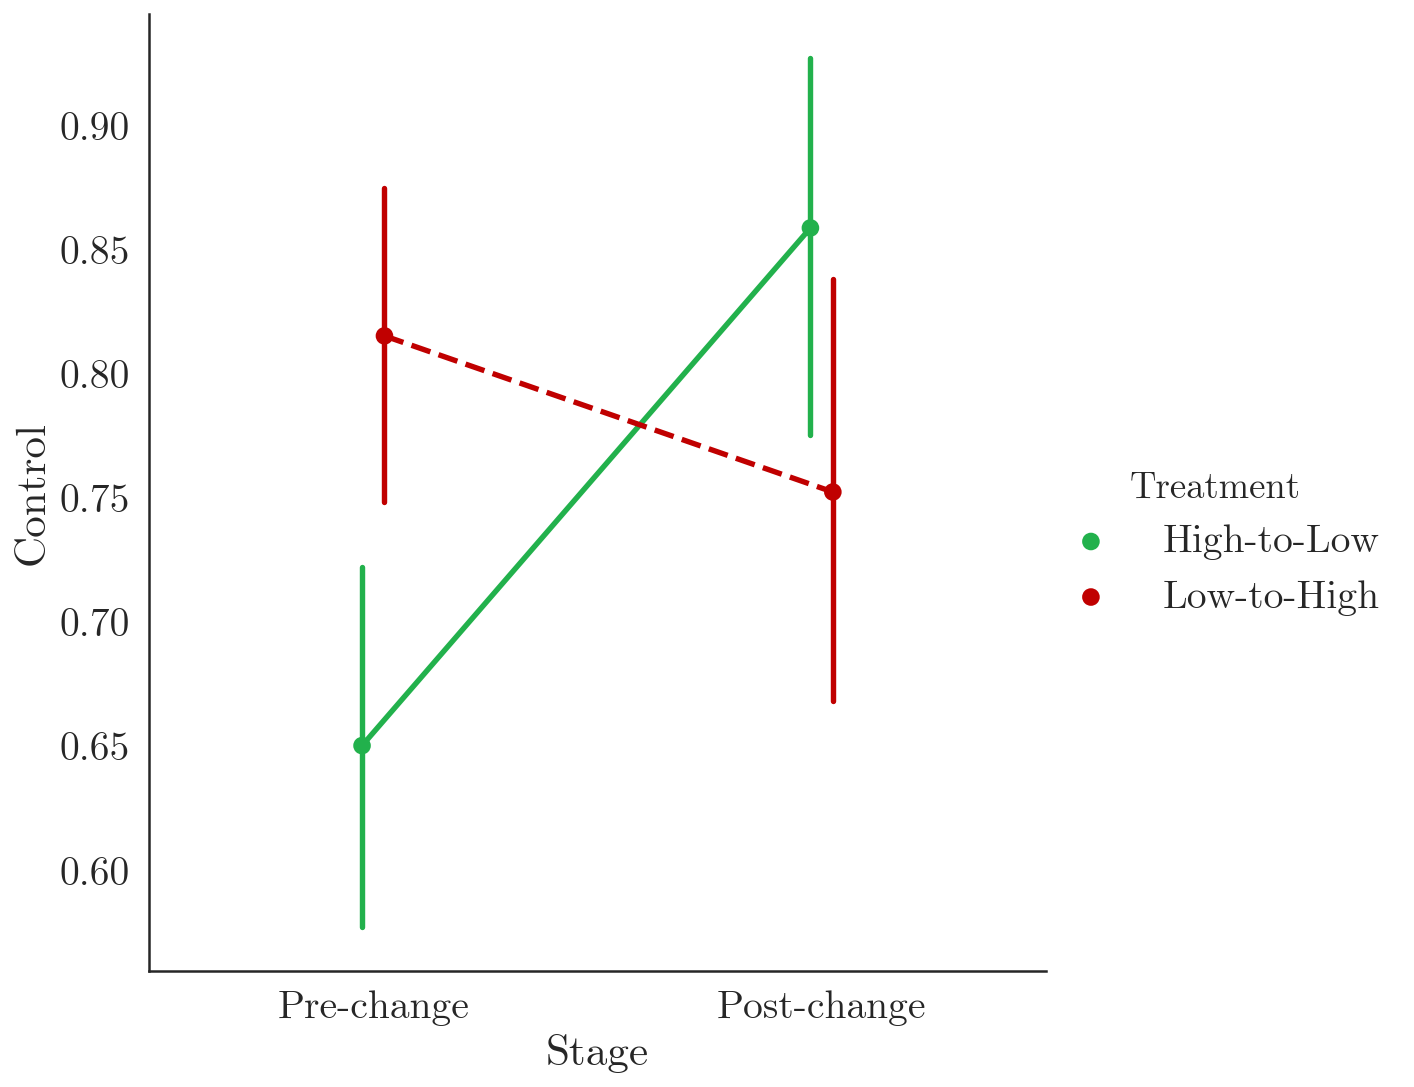

In [31]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "Control", "Treatment", dataPrin, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, units="group(participantcode)", ci=95);
plt.savefig(r"3. Output\Figure3.png", dpi=600)

### Split by Timing of the change

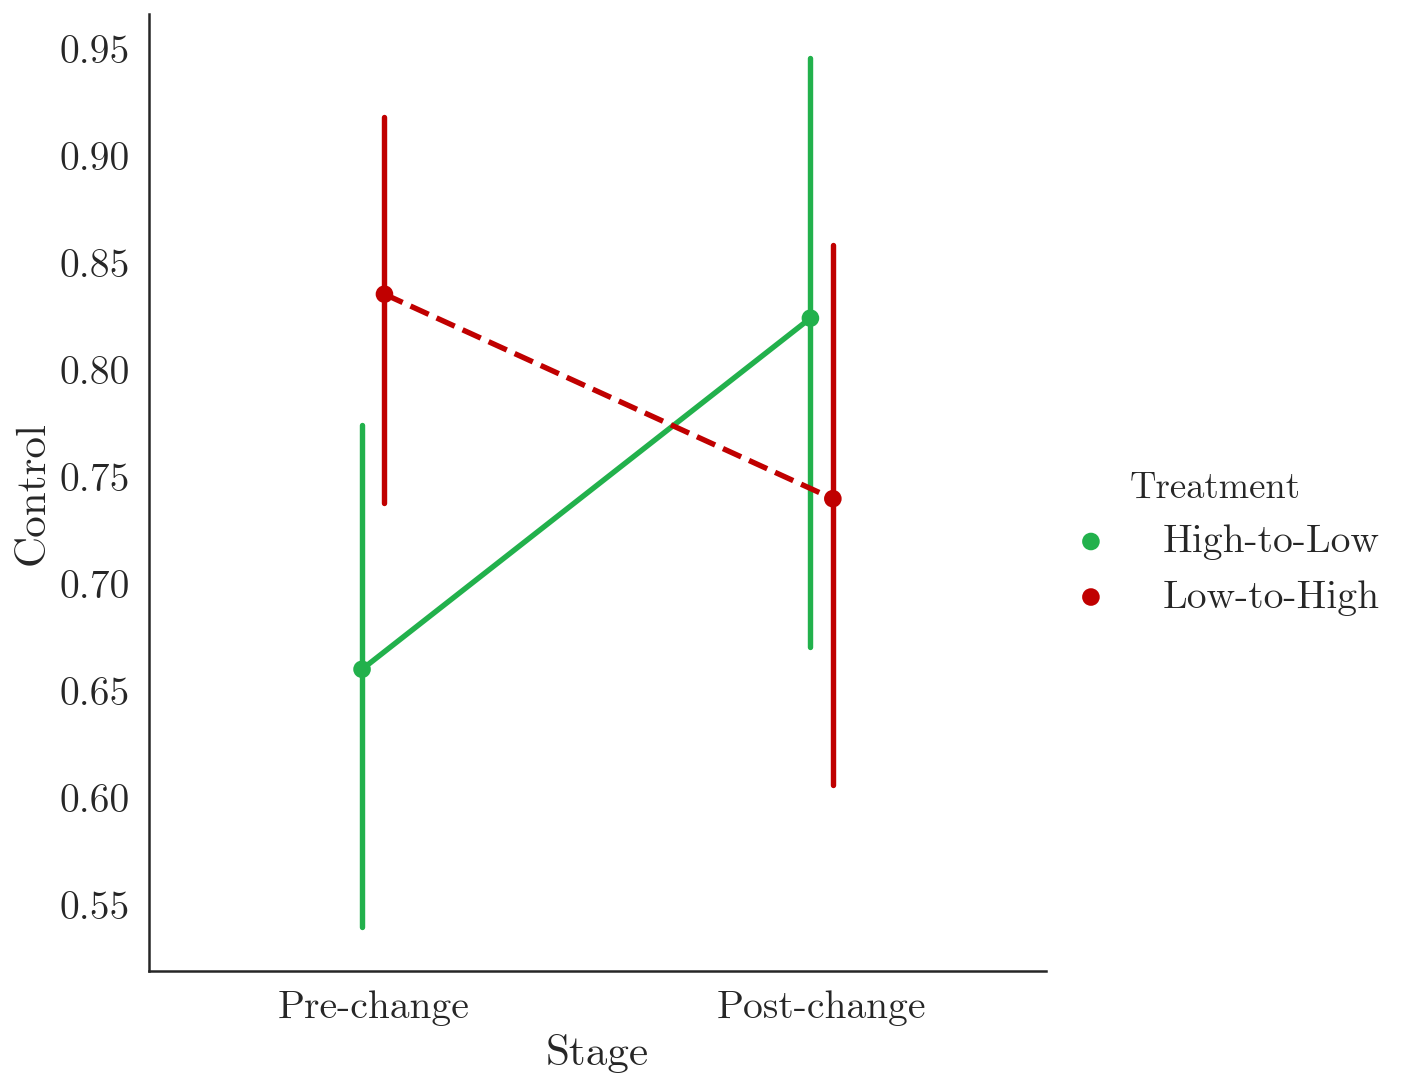

In [32]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "Control", "Treatment", dataPrinEarly, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, units="group(participantcode)", ci=95);
#plt.savefig(r"3. Output\Difference in difference CMU Serif Color Early.png", dpi=600)

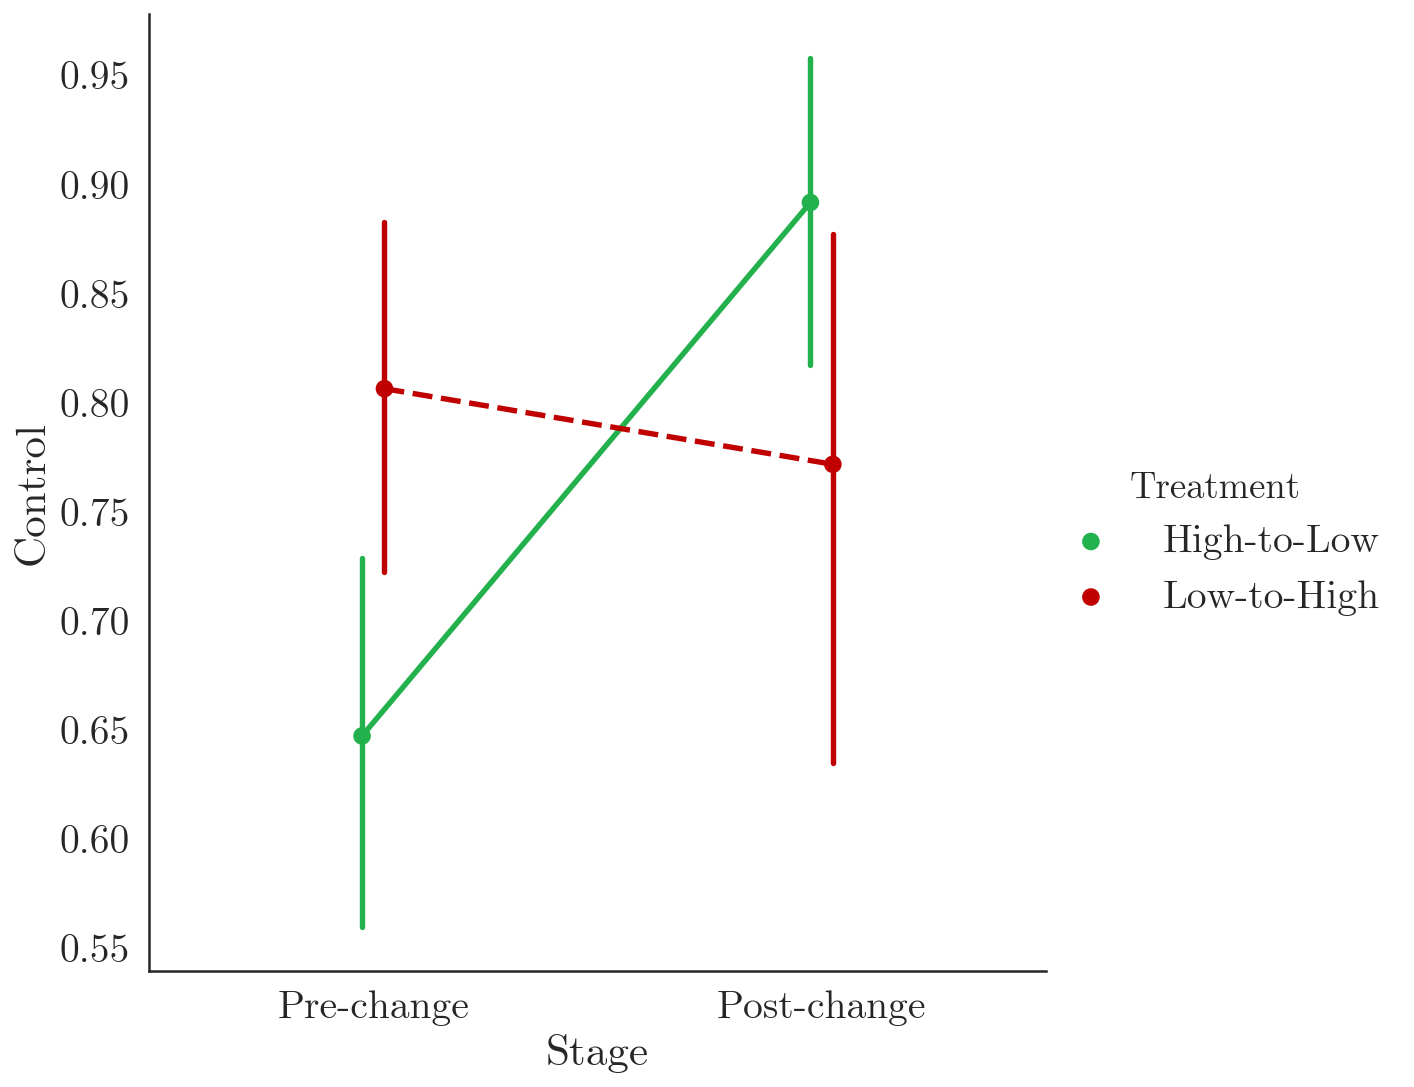

In [33]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "Control", "Treatment", dataPrinLate, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, units="group(participantcode)", ci=95);
#plt.savefig(r"3. Output\Difference in difference CMU Serif Color Late.png", dpi=600)

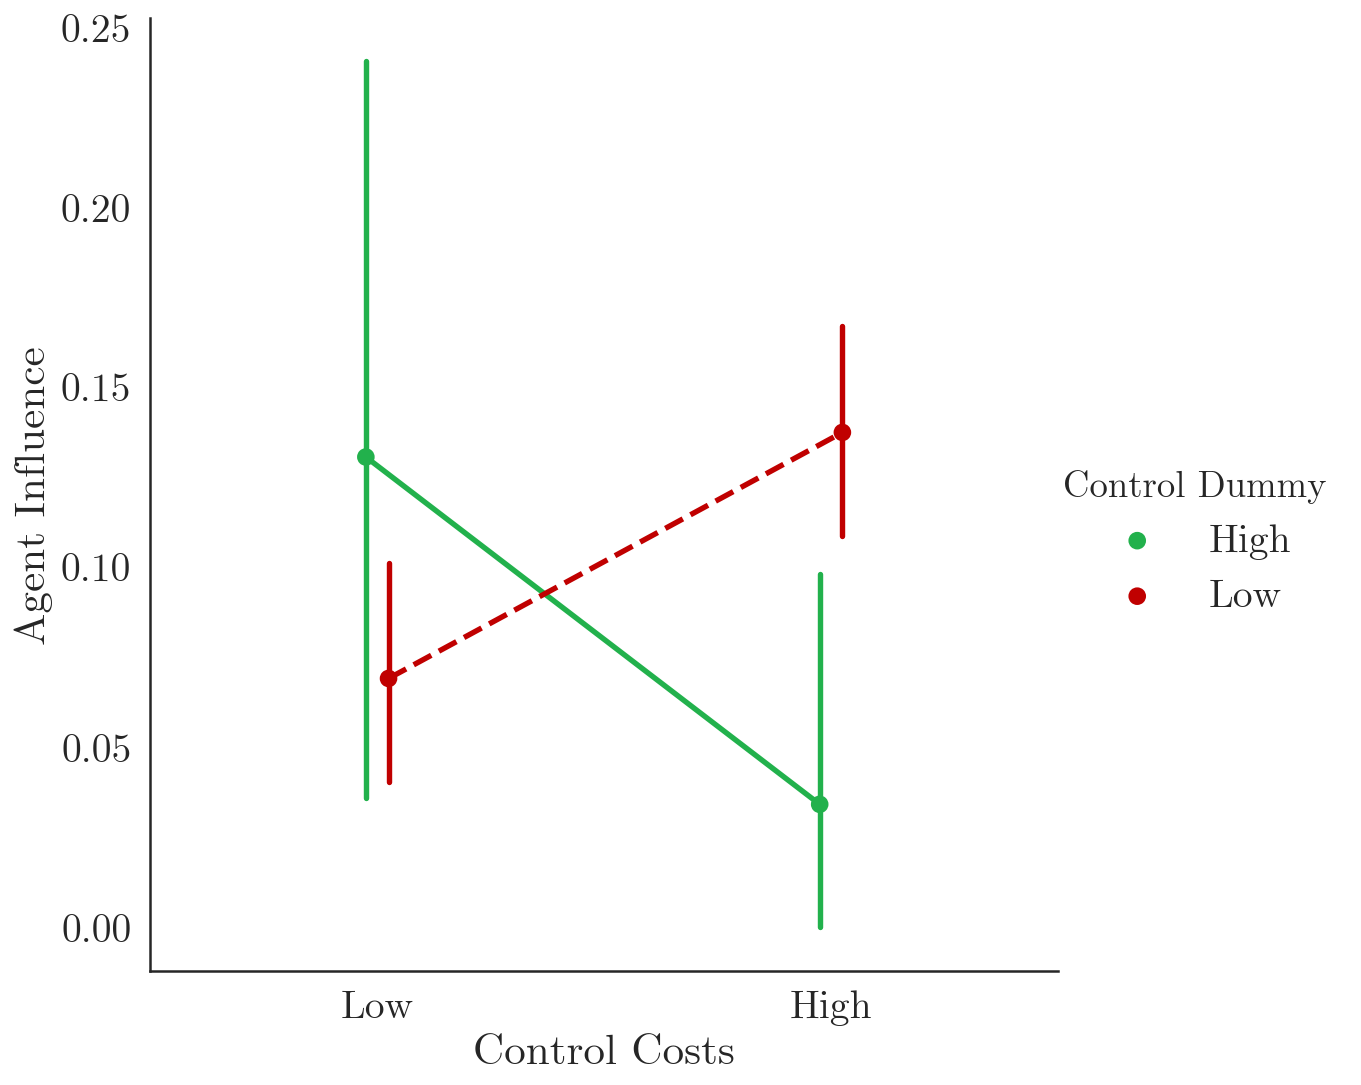

In [34]:
#sns.lmplot(x="Control", y="Agent Influence", col="Control Costs", hue="Control Costs", hue_order=["Low", "High"], data=dataPrin, size=8, ci=95, units="ida")
#dataPrin, kind="bar", linestyles=["--", "-"], dodge=0.05, size=8, units="ida", legend_out=False, ci=95);
sns.catplot("Control Costs", "Agent Influence", "Control Dummy", dataPrin, palette=sns.color_palette(flatui, n_colors=2), kind="point", order=["Low", "High"], linestyles=["-", "--"], dodge=0.05, height=8, units="group(participantcode)", ci=95);
#plt.savefig(r"3. Output\Difference in difference Trust.png", dpi=600)

### Information History Search

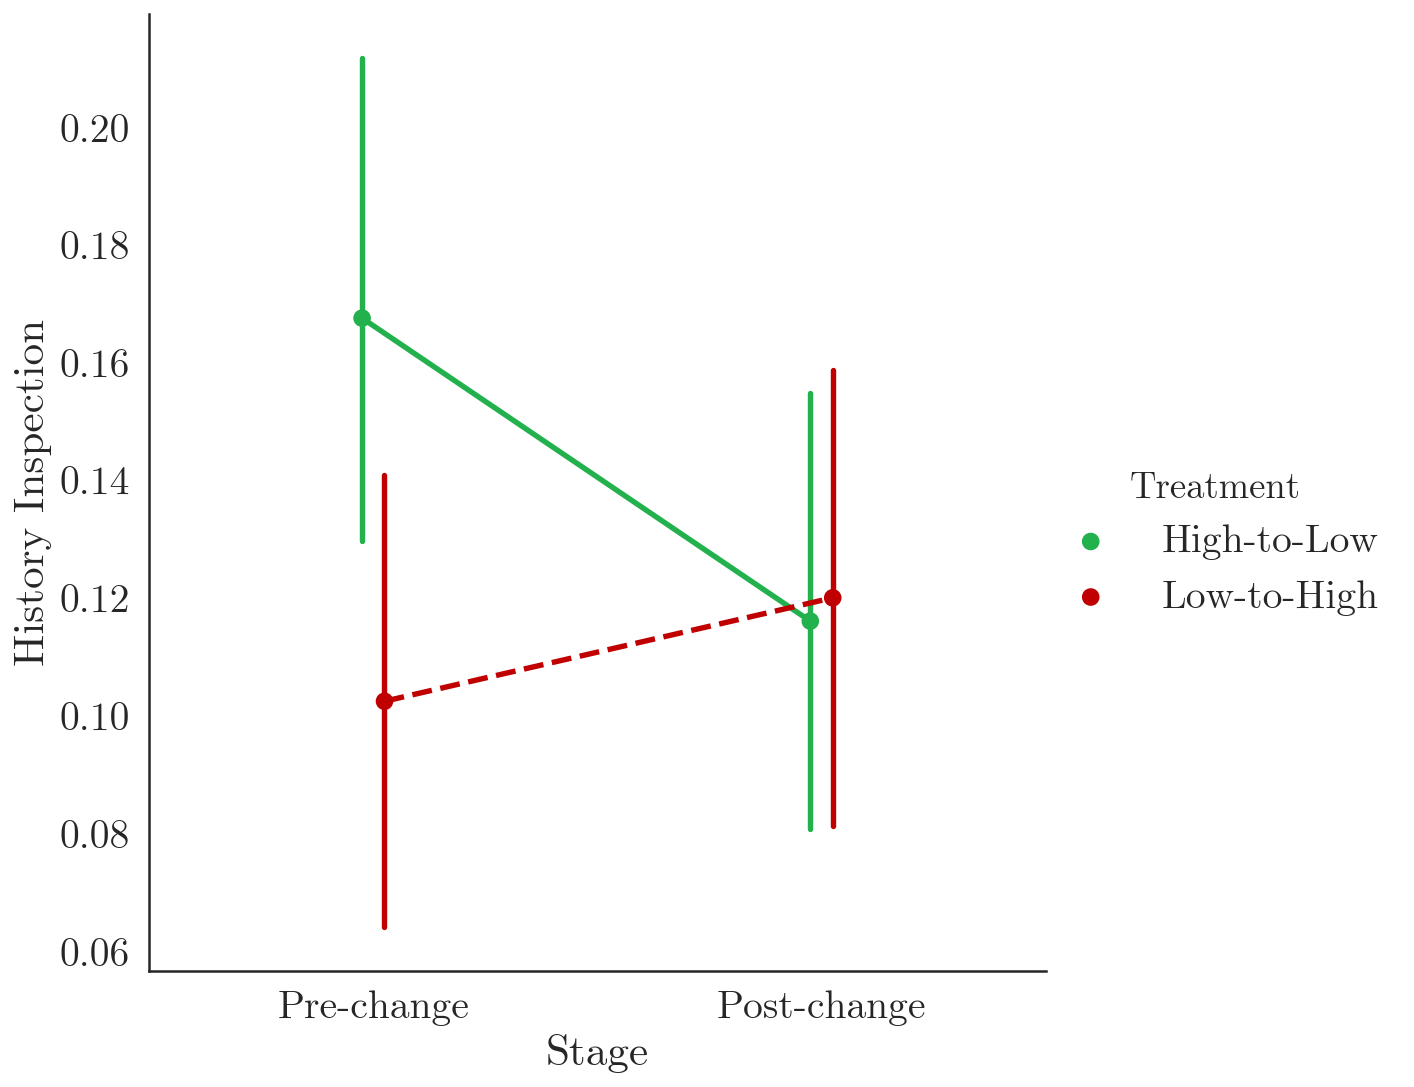

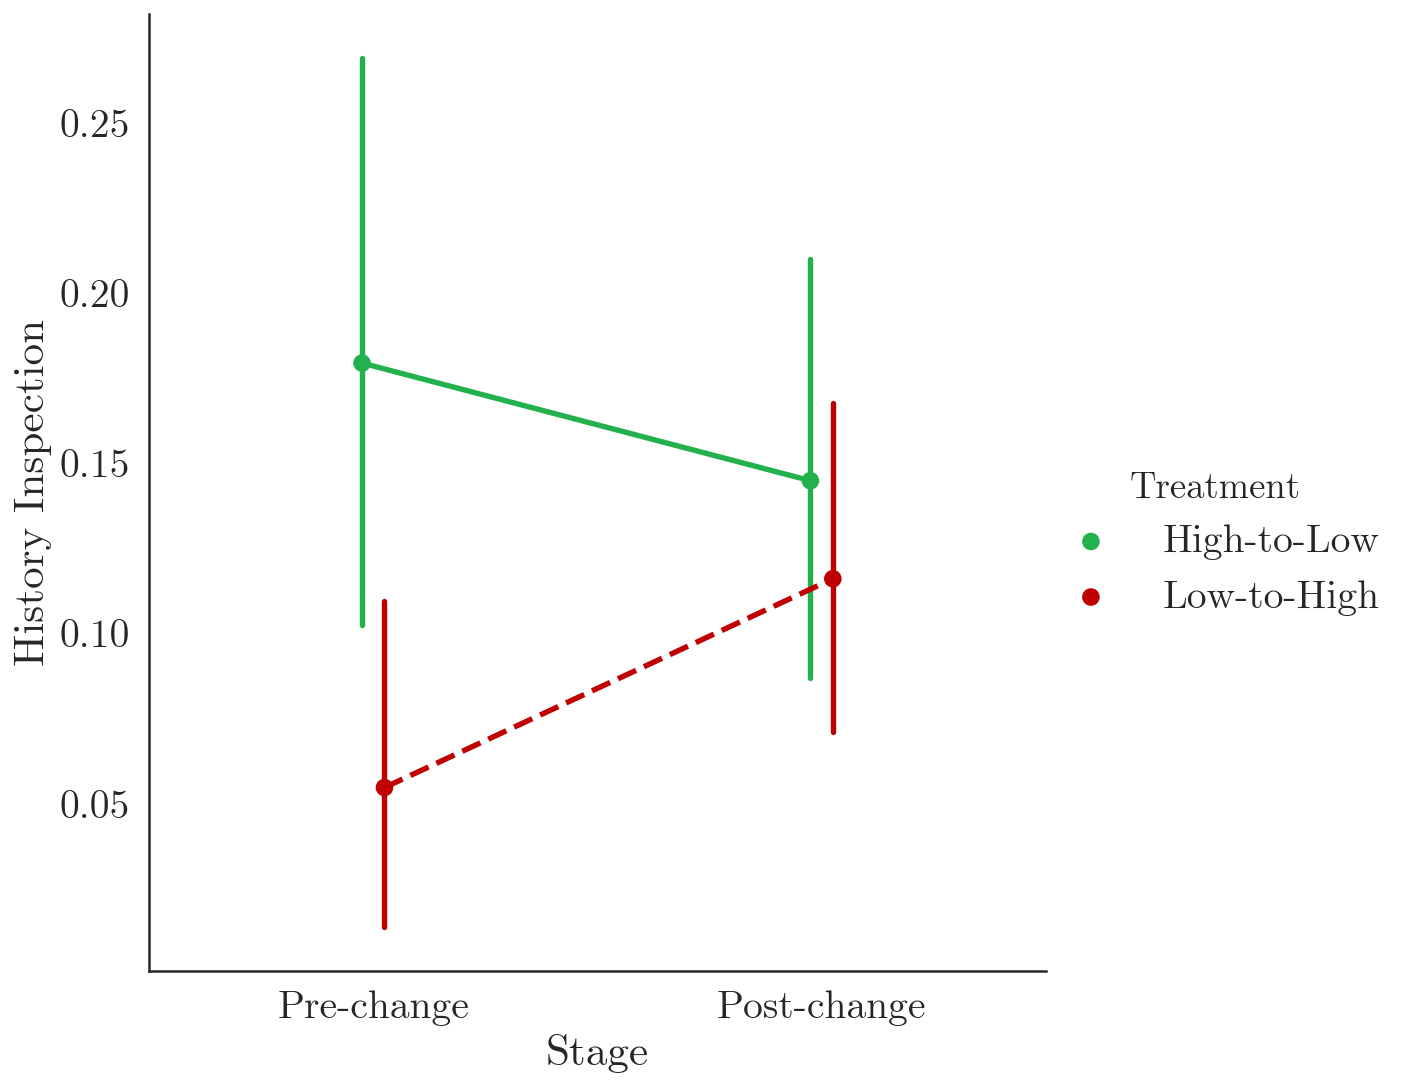

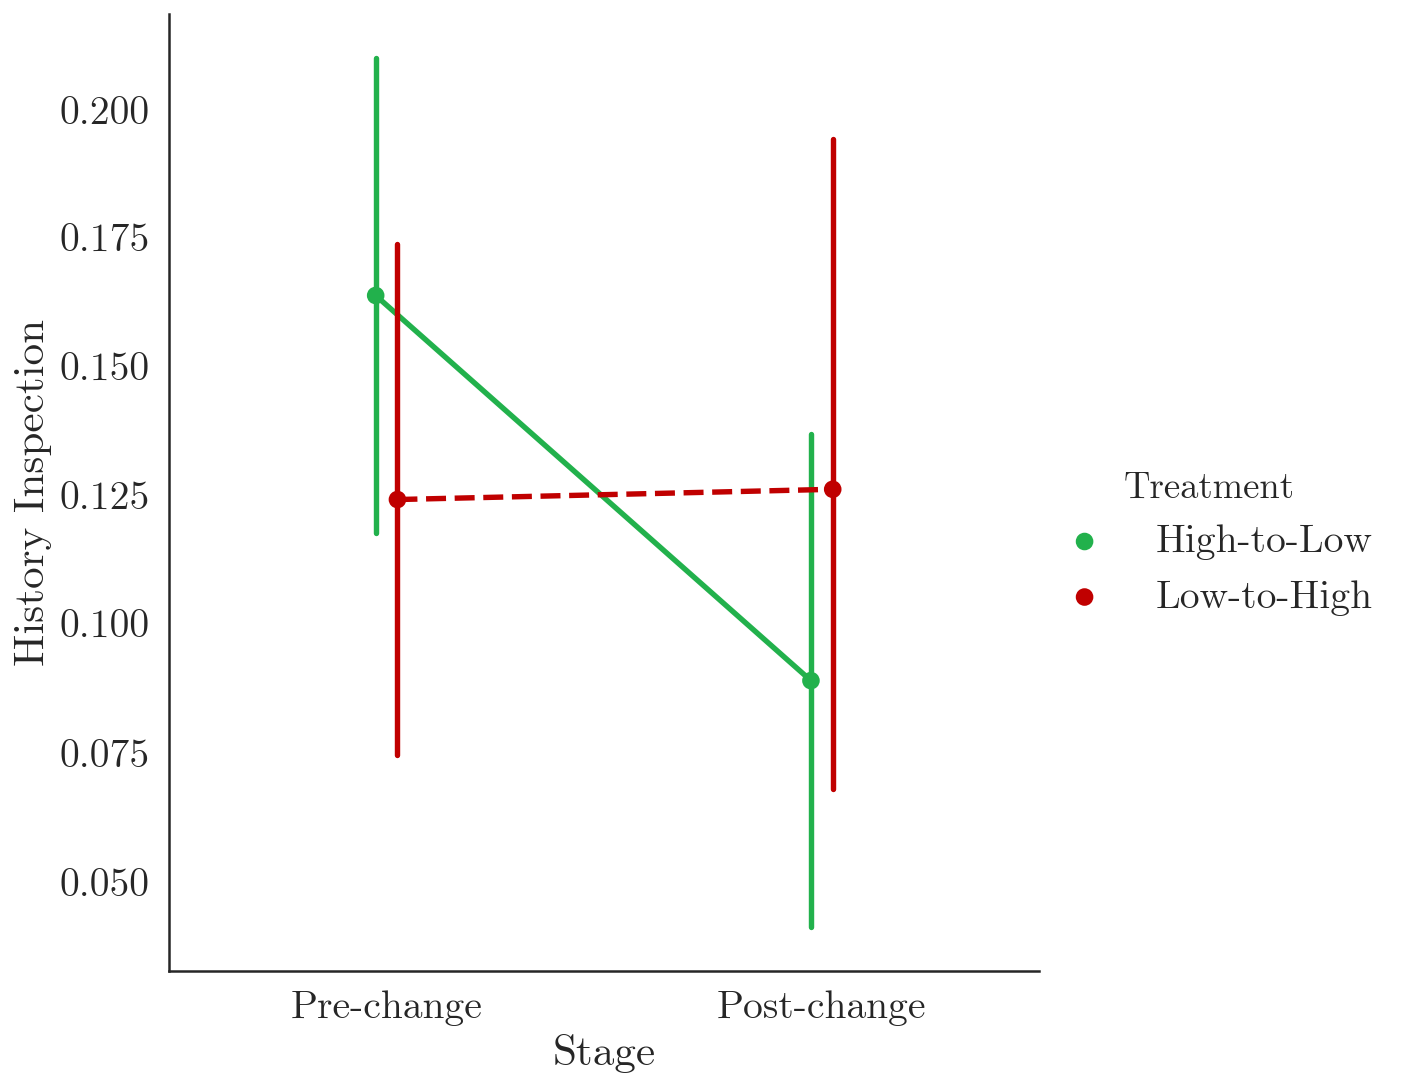

In [35]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "History Inspection", "Treatment", dataPrin, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
plt.savefig(r"3. Output\Figure4.png", dpi=600)

sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "History Inspection", "Treatment", dataPrinEarly, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);

sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "History Inspection", "Treatment", dataPrinLate, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);


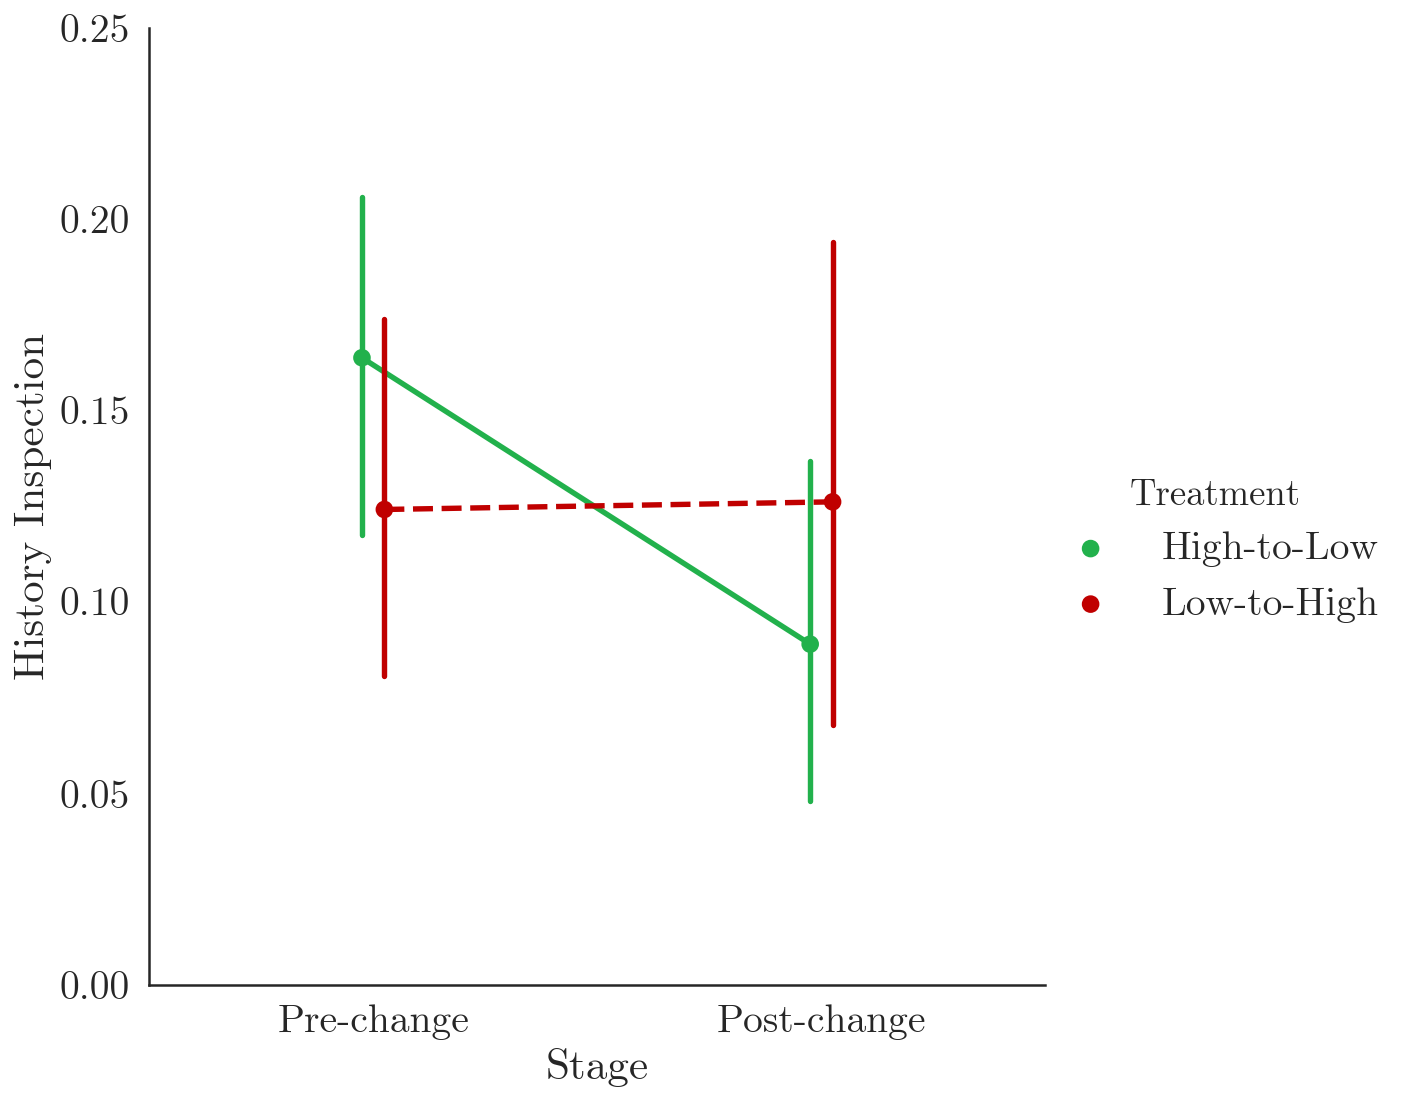

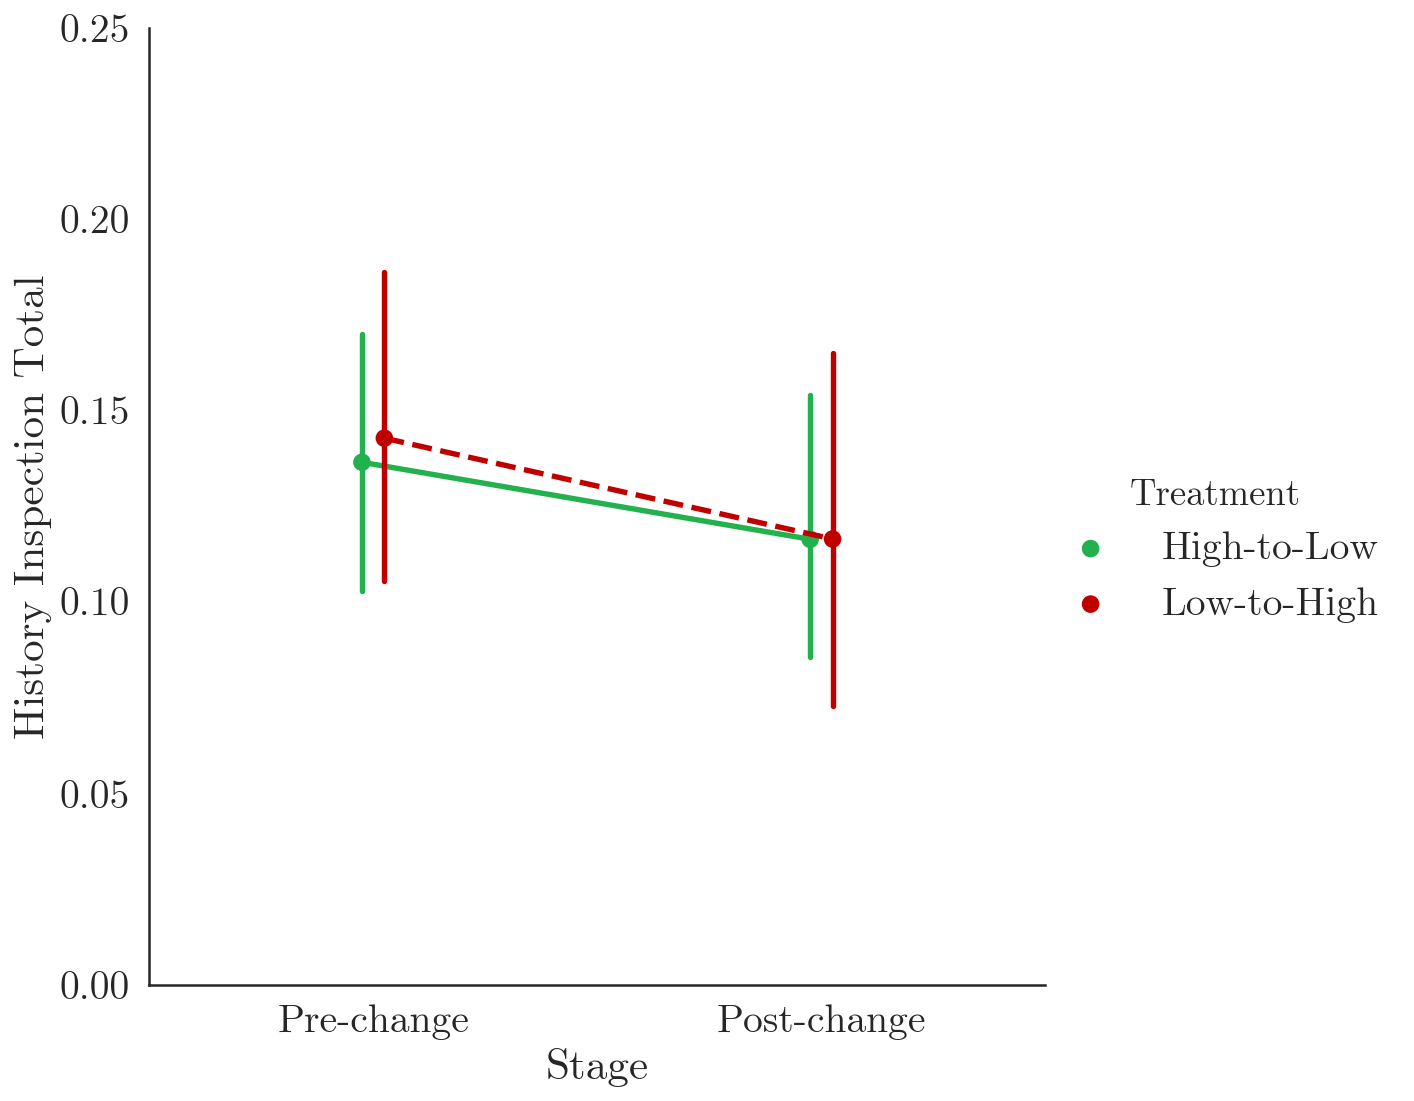

In [36]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
g = sns.catplot("Stage", "History Inspection", "Treatment", dataPrinLate, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
(g.set(ylim=(0, 0.25)))
#plt.savefig(r"3. Output\Figure5.png", dpi=600)

g = sns.catplot("Stage", "History Inspection Total", "Treatment", dataPrinLate, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
(g.set(ylim=(0, 0.25)))

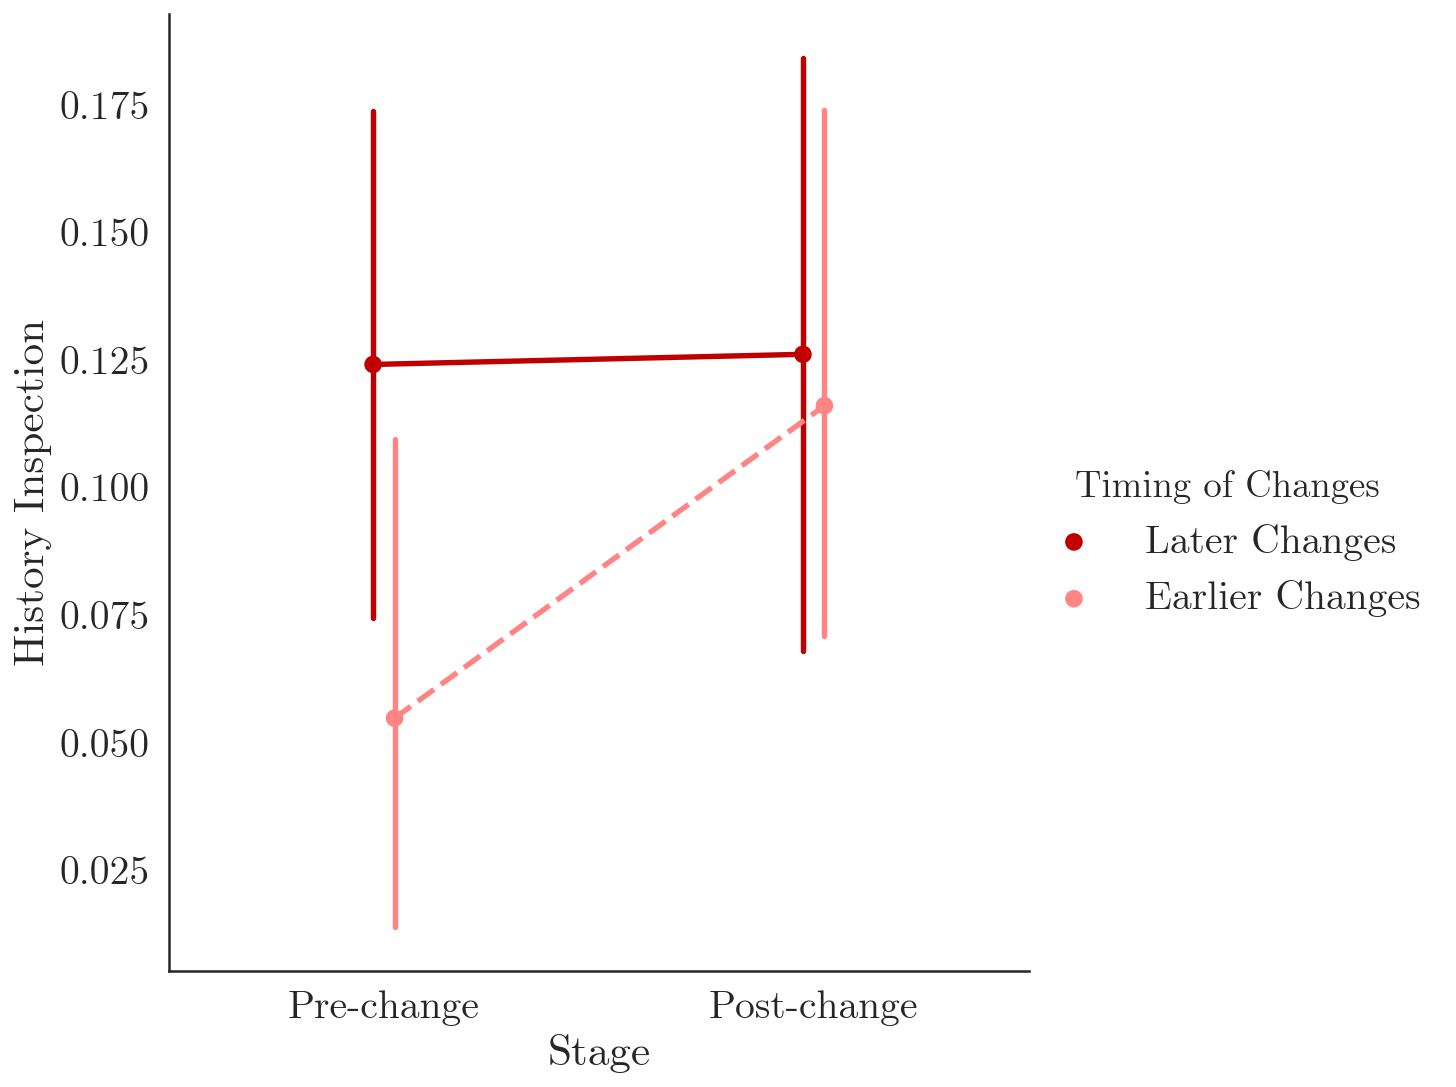

In [37]:
flatui_red = ["#c00000", "#ff8585"]
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "History Inspection", "Timing of Changes", dataPrinLH, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui_red, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
#plt.savefig(r"3. Output\Difference in difference CMU Serif Color History LH.png", dpi=600)

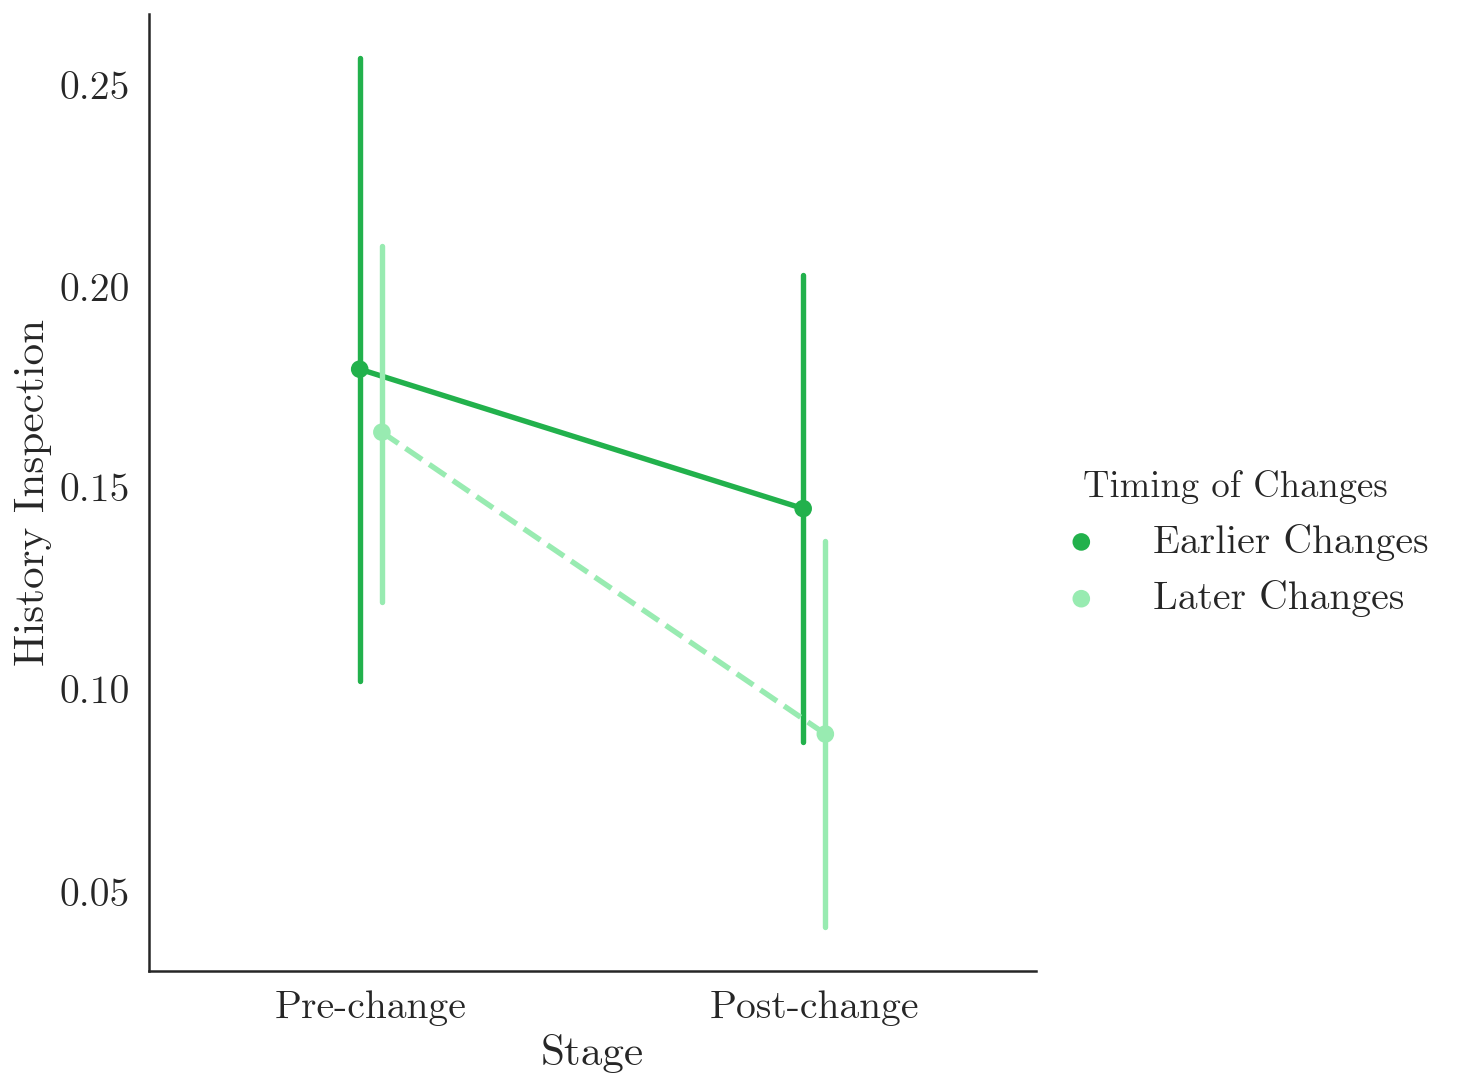

In [38]:
flatui_green = ["#22b14c", "#98ebb1"]
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "History Inspection", "Timing of Changes", dataPrinHL, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui_green, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
#plt.savefig(r"3. Output\Difference in difference CMU Serif Color History HL.png", dpi=600)

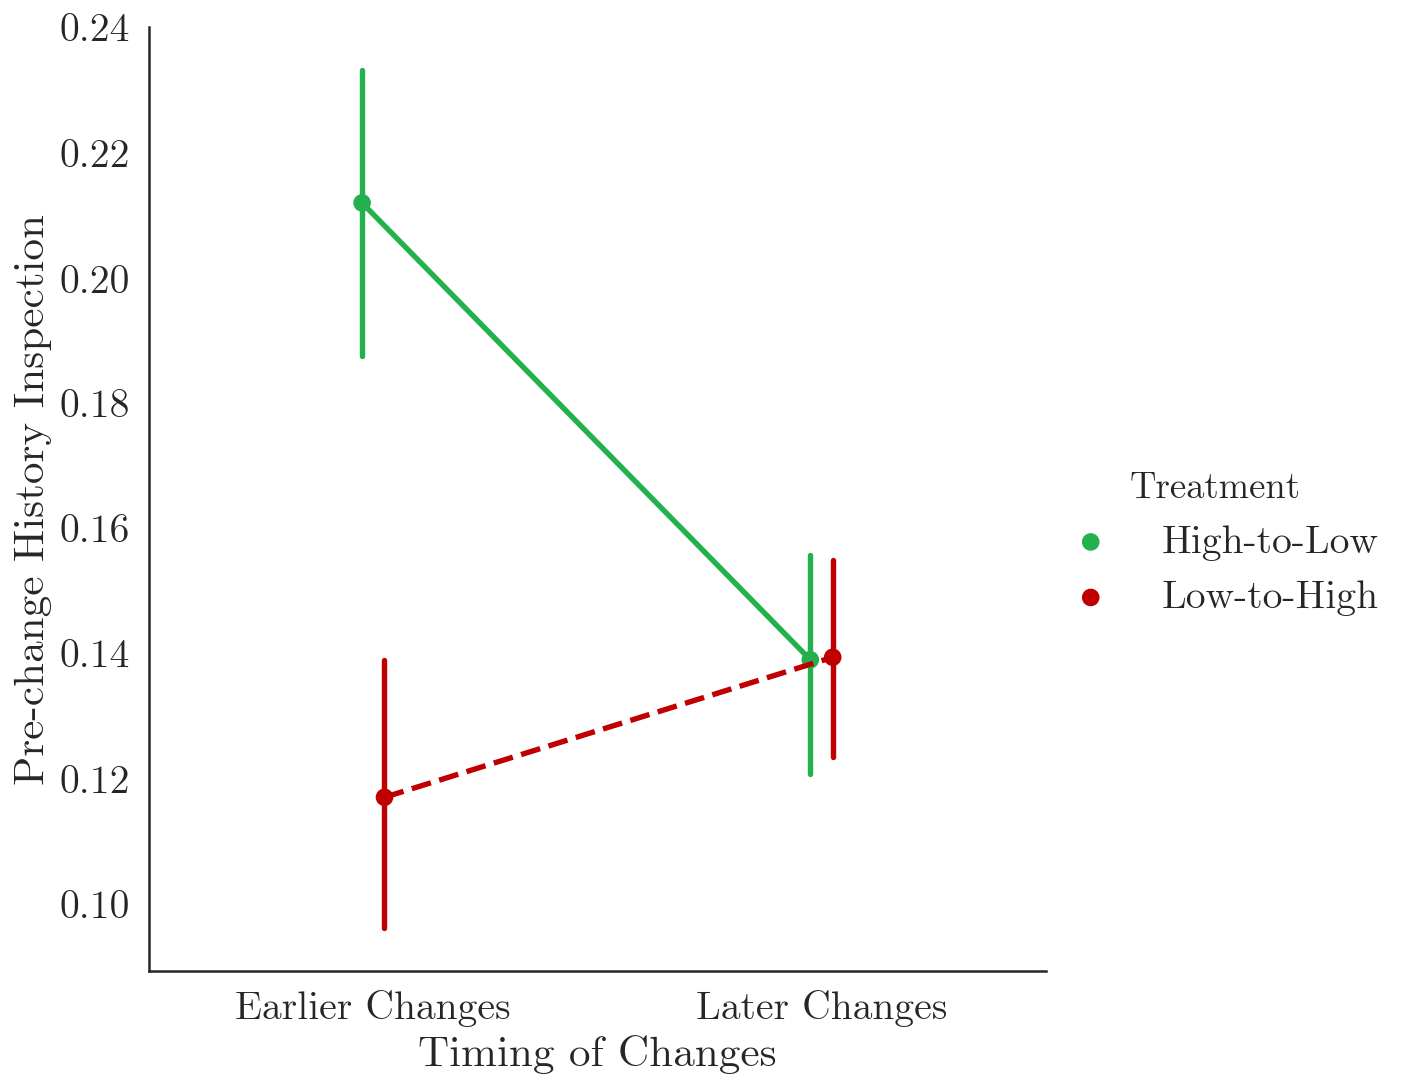

In [39]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Timing of Changes", "Pre-change History Inspection", "Treatment", dataPrin, kind="point", order=["Earlier Changes", "Later Changes"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
#plt.savefig(r"3. Output\Difference in difference CMU Serif Color Pre-change History.png", dpi=600)

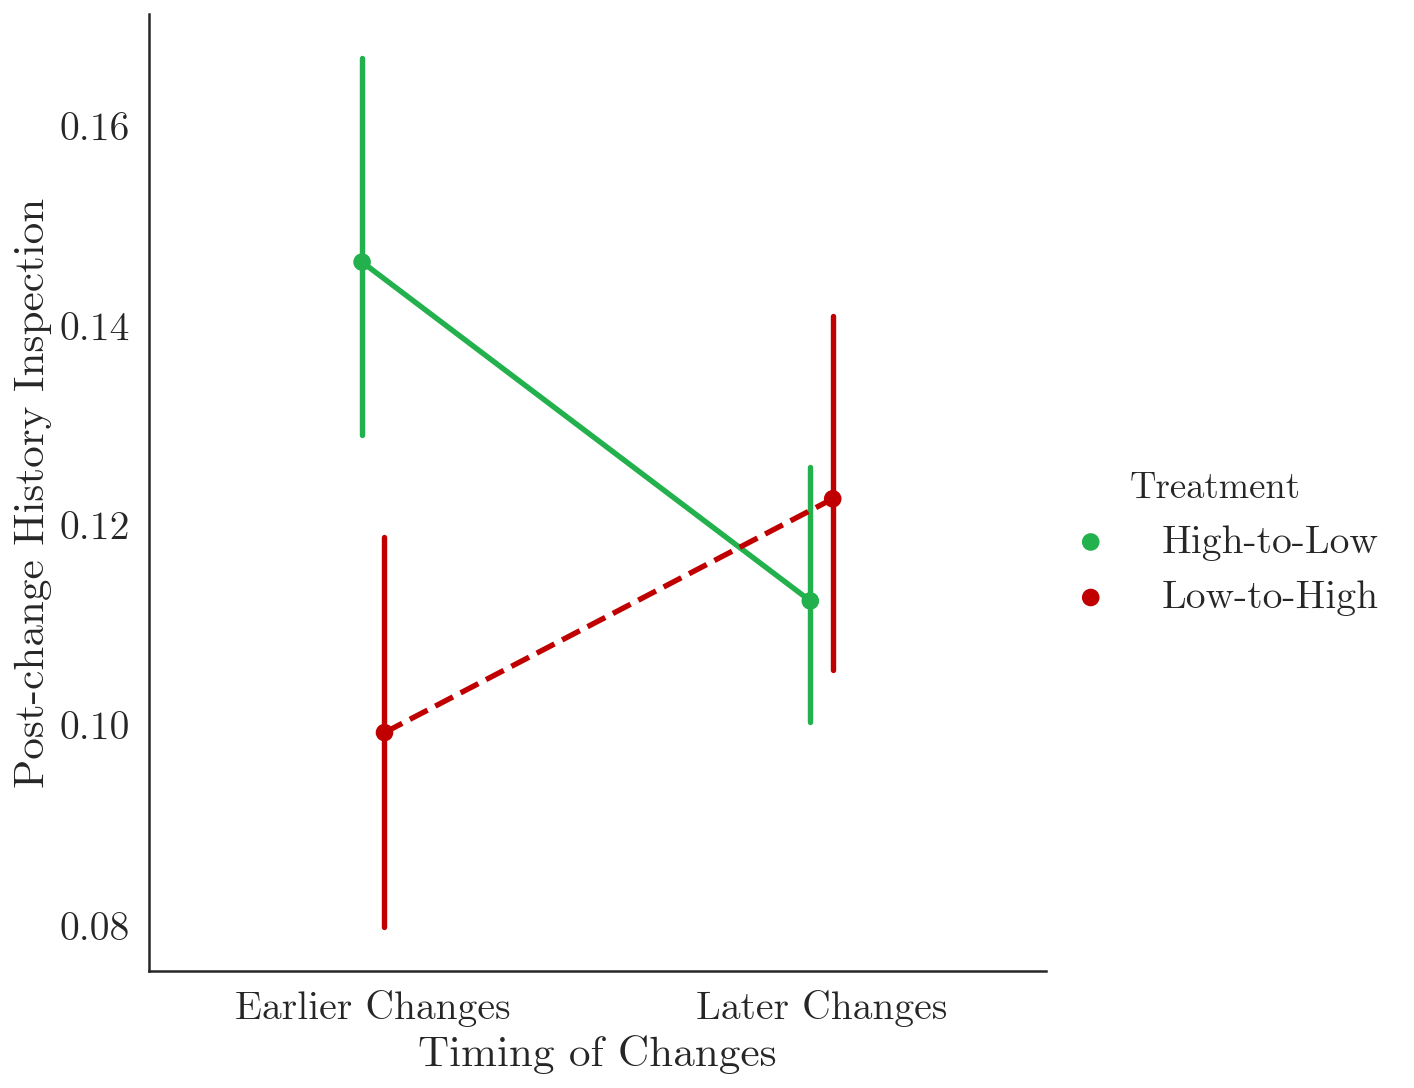

In [40]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Timing of Changes", "Post-change History Inspection", "Treatment", dataPrin, kind="point", order=["Earlier Changes", "Later Changes"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, ci=95);
#plt.savefig(r"3. Output\Difference in difference CMU Serif Color Post-change History.png", dpi=600)

### Black and White for Latex

C:\Users\gebruiker\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


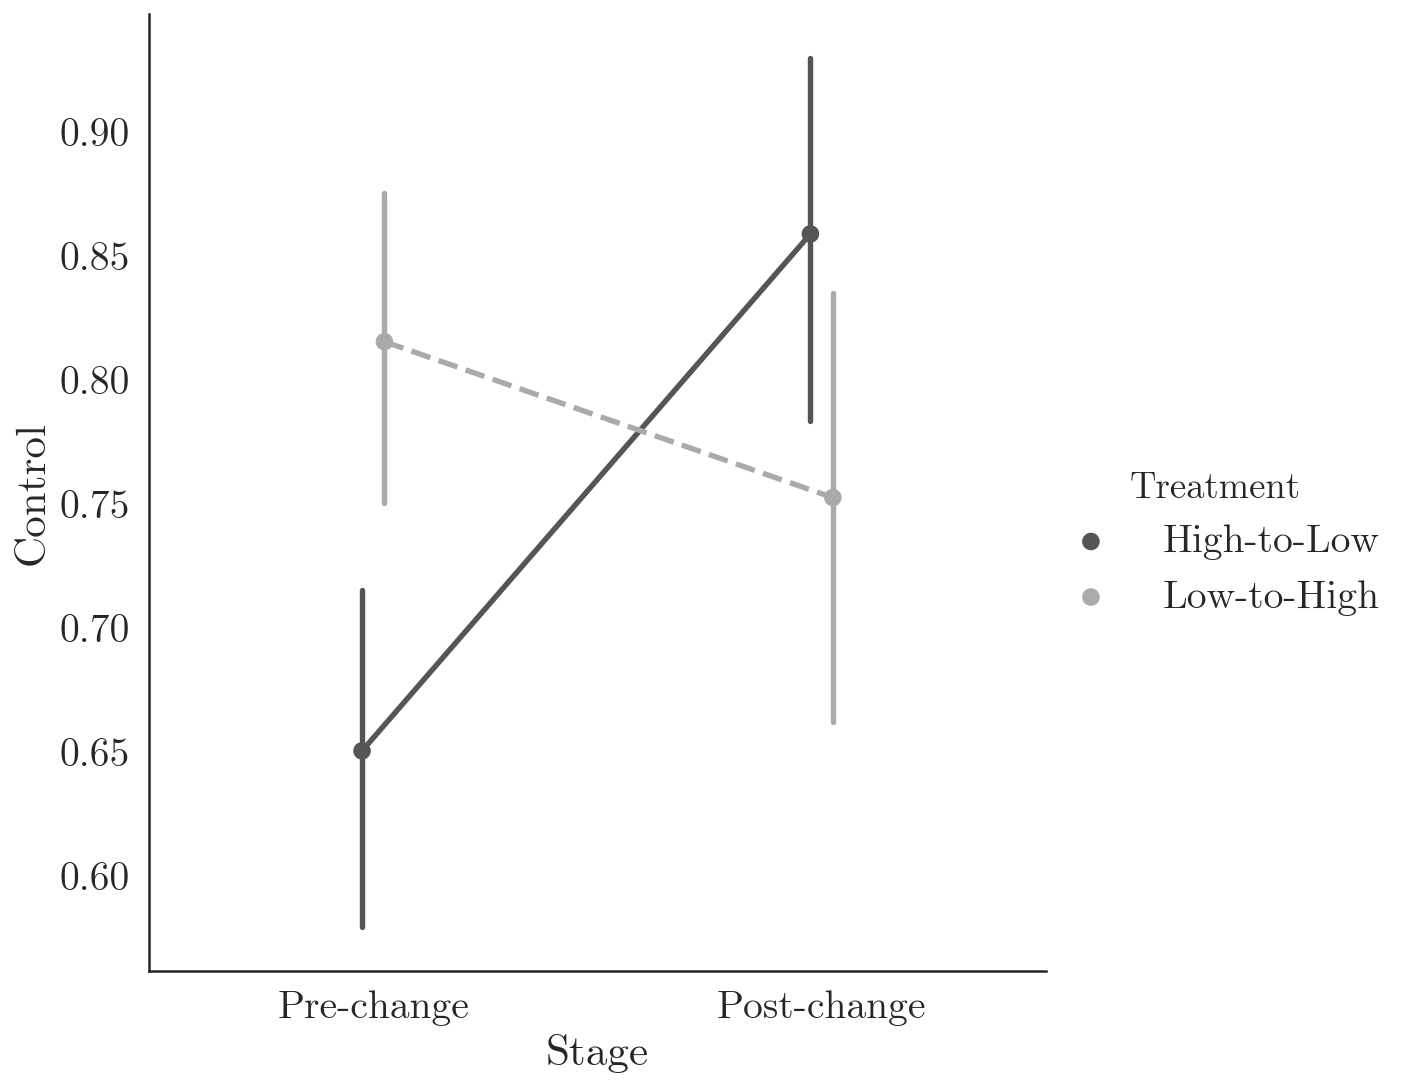

In [41]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Stage", "Control", "Treatment", dataPrin, kind="point", order=["Pre-change", "Post-change"], linestyles=["-", "--"], dodge=0.05, size=8, palette="gray", units="group(participantcode)", ci=95);
#plt.savefig(r"3. Output\Difference in difference black-white.png", dpi=600)

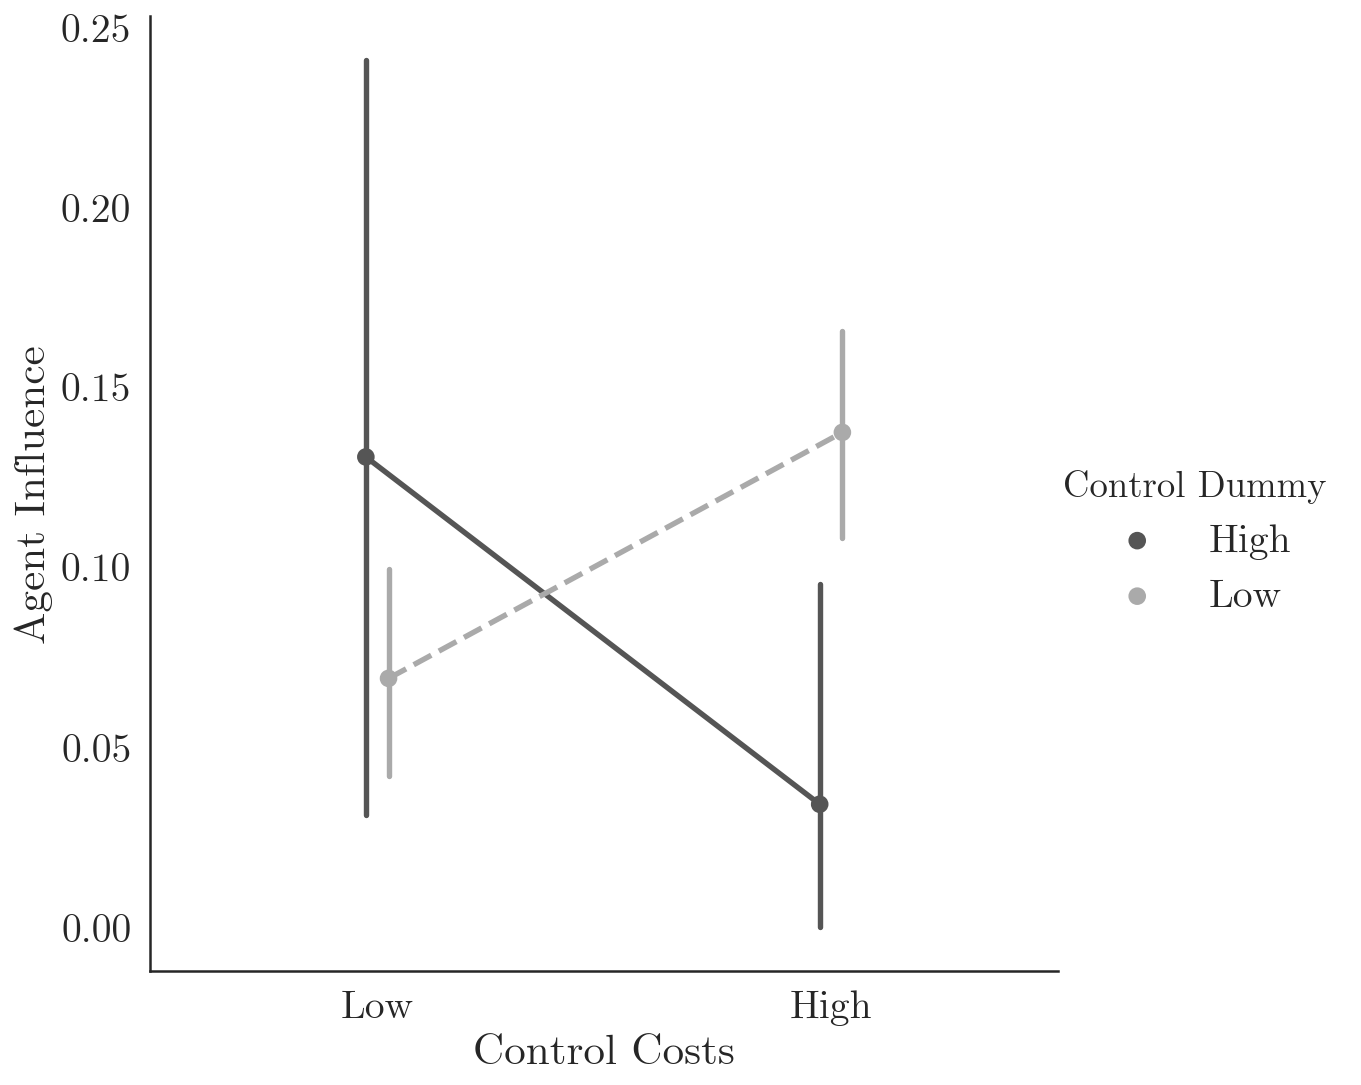

In [42]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
sns.catplot("Control Costs", "Agent Influence", "Control Dummy", dataPrin, kind="point", order=["Low", "High"], linestyles=["-", "--"], dodge=0.05, height=8, palette="gray", units="group(participantcode)", ci=95);
#plt.savefig(r"3. Output\Difference in difference trust black-white.png", dpi=600)

### Histograms

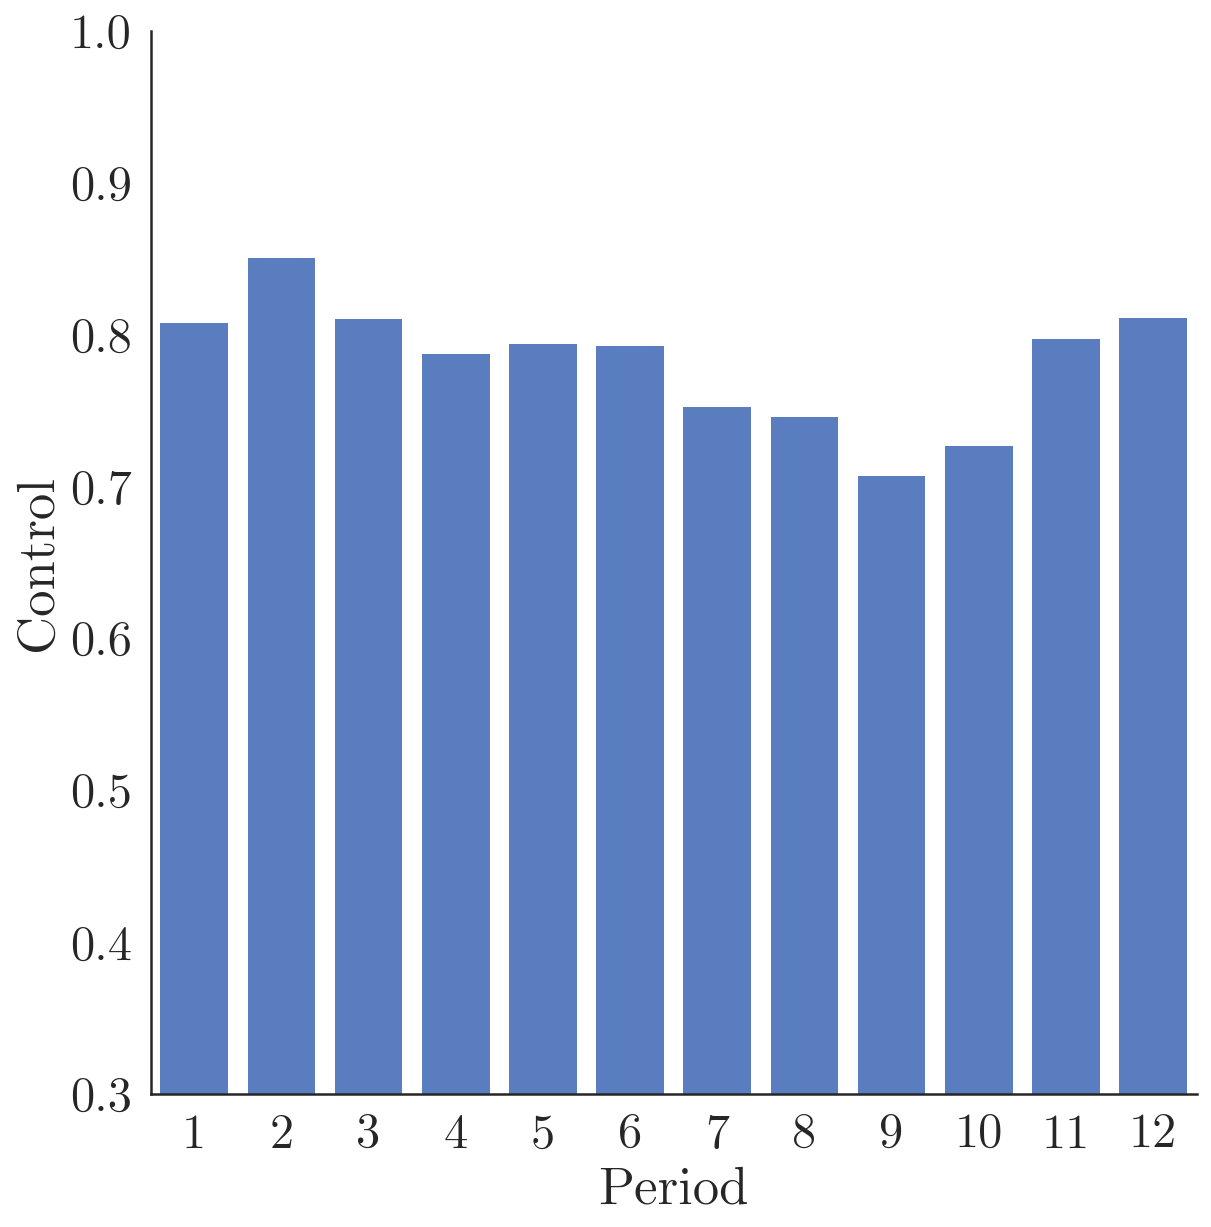

In [43]:
with sns.plotting_context("notebook", font_scale=2.2):
    g = sns.catplot(x="Period", y="Control", ci=None, dodge=0.10, kind="bar", data=dataPrinLH, palette=sns.color_palette("muted", n_colors=1), aspect=1, height=9)
    (g.set(ylim=(0.30, 1.00)))
#plt.savefig(r"3. Output\Histogram L-H.png", dpi=600)

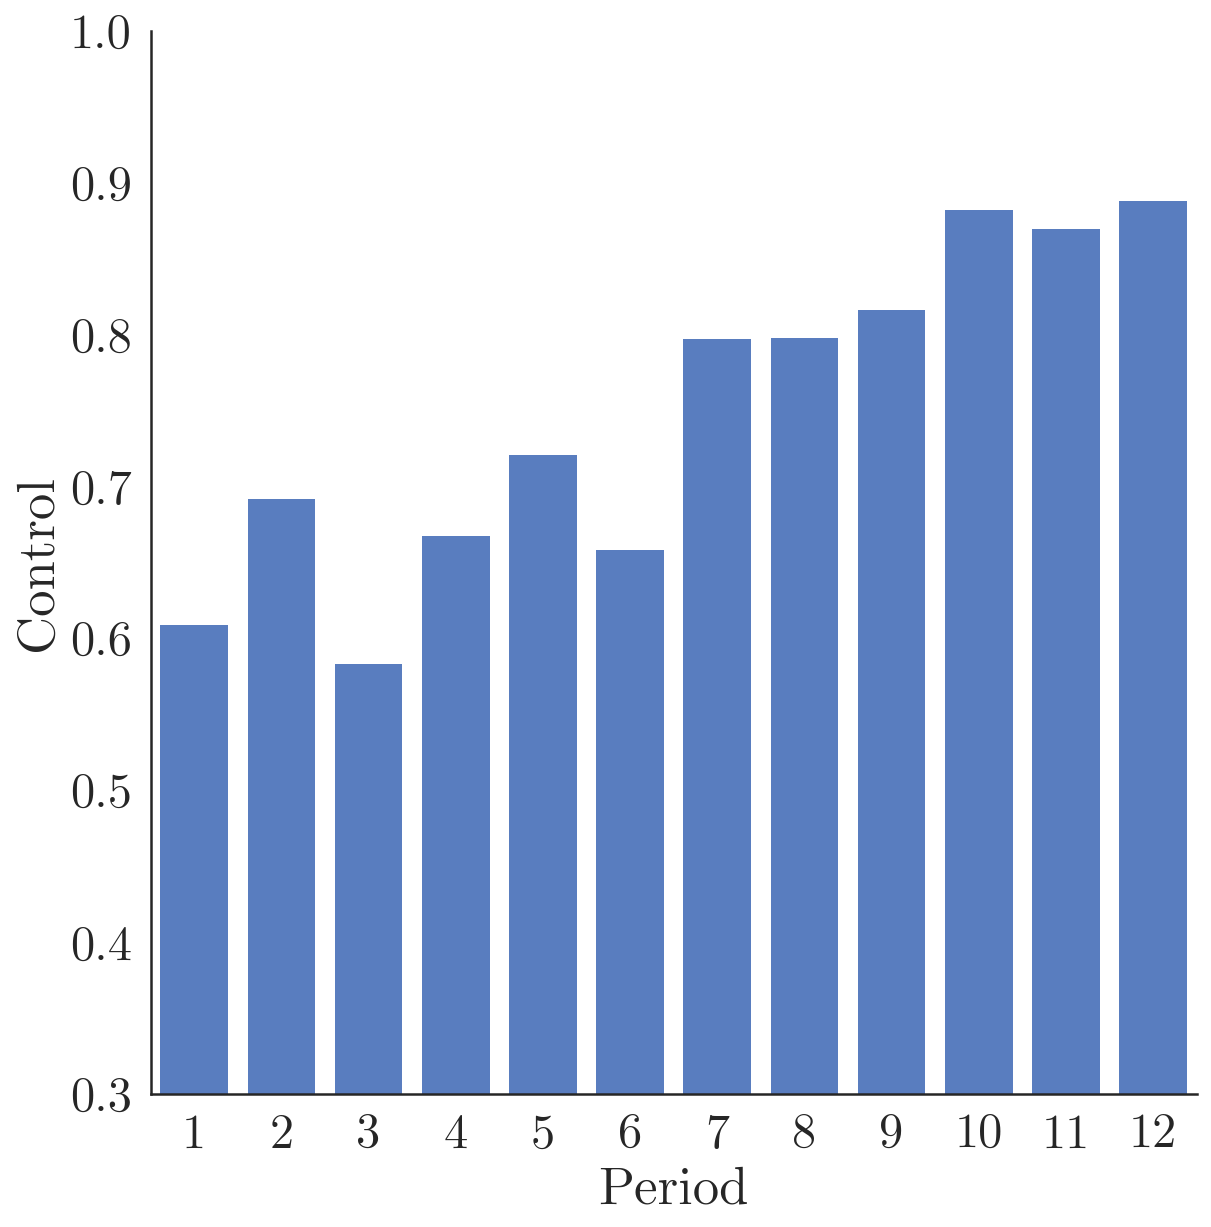

In [44]:
with sns.plotting_context("notebook", font_scale=2.2):
    g = sns.catplot(x="Period", y="Control", ci=None, dodge=0.10, kind="bar", data=dataPrinHL, palette=sns.color_palette("muted", n_colors=1), aspect=1, height=9)
    (g.set(ylim=(0.30, 1.00)))
#plt.savefig(r"3. Output\Histogram H-L.png", dpi=600)

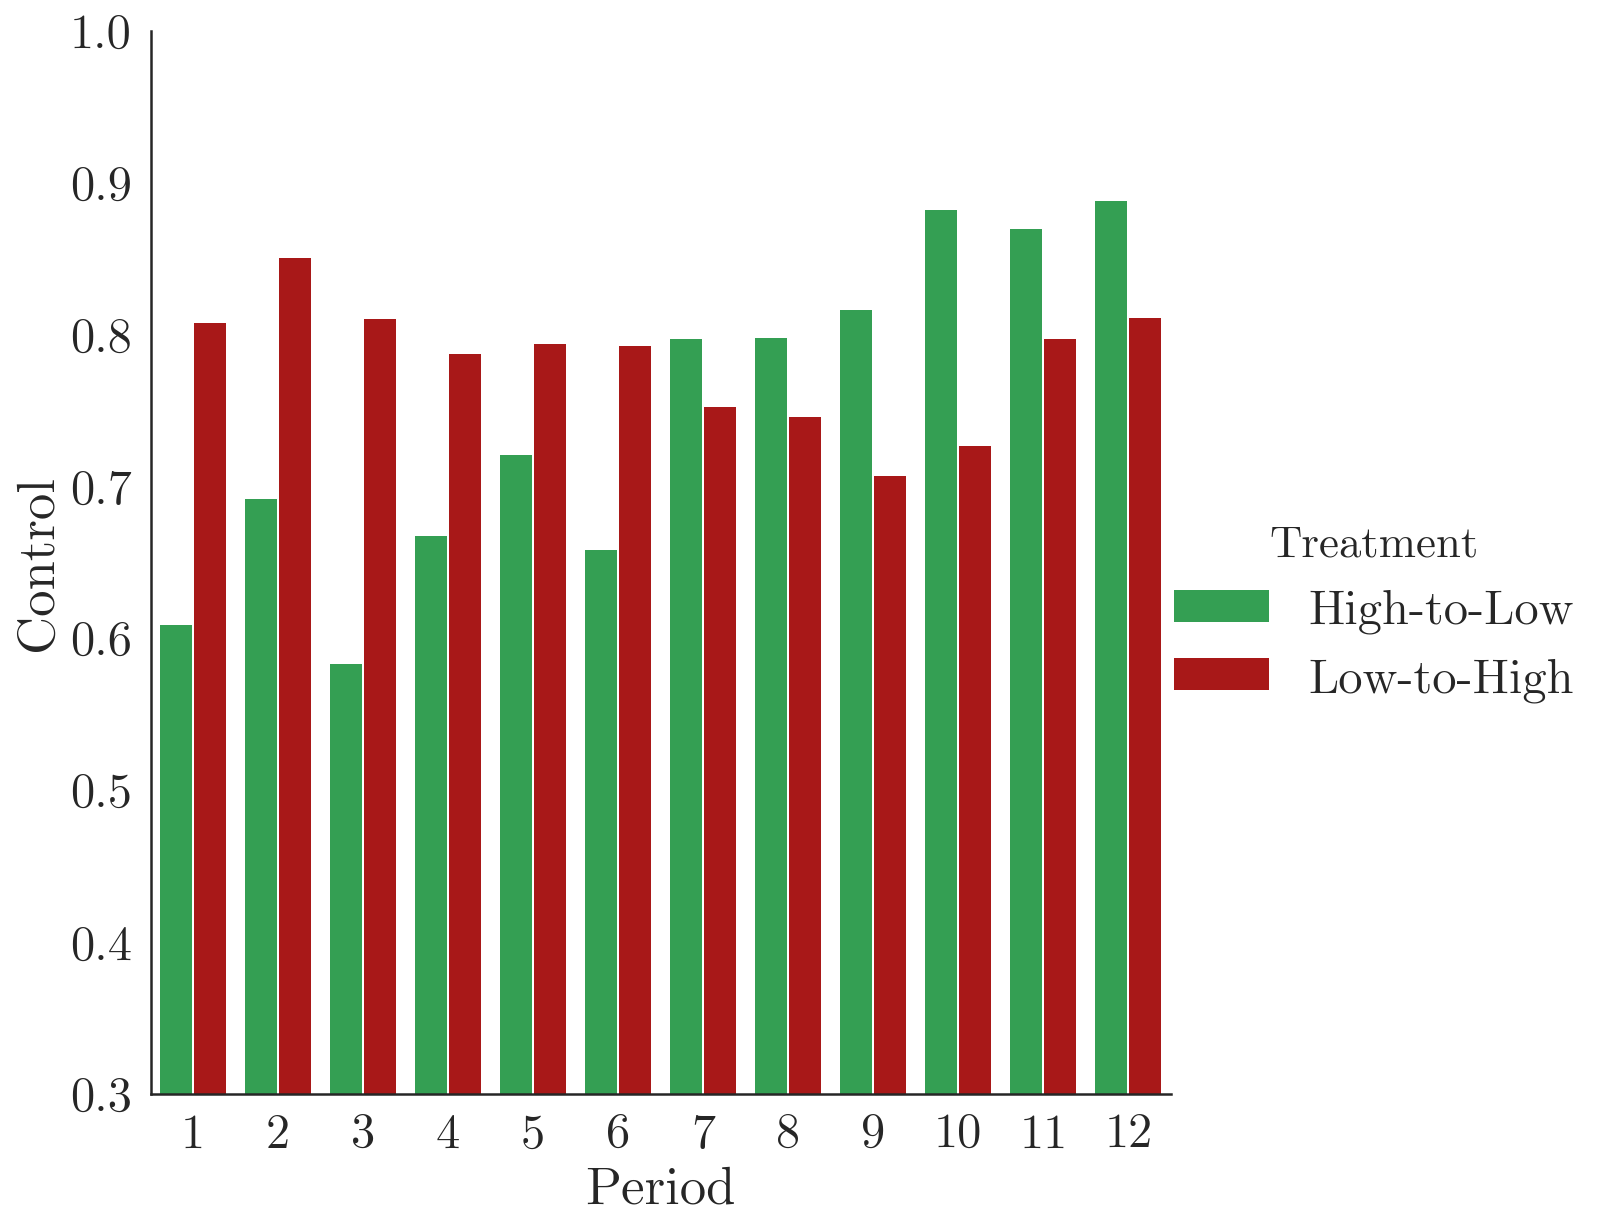

In [45]:
with sns.plotting_context("notebook", font_scale=2.2):
    g = sns.catplot(x="Period", y="Control", hue="Treatment", ci=None, dodge=0.10, kind="bar", data=dataPrin, palette=sns.color_palette(flatui, n_colors=2), aspect=1, height=9)
    (g.set(ylim=(0.30, 1.00)))
#plt.savefig(r"3. Output\Histogram.png", dpi=600)

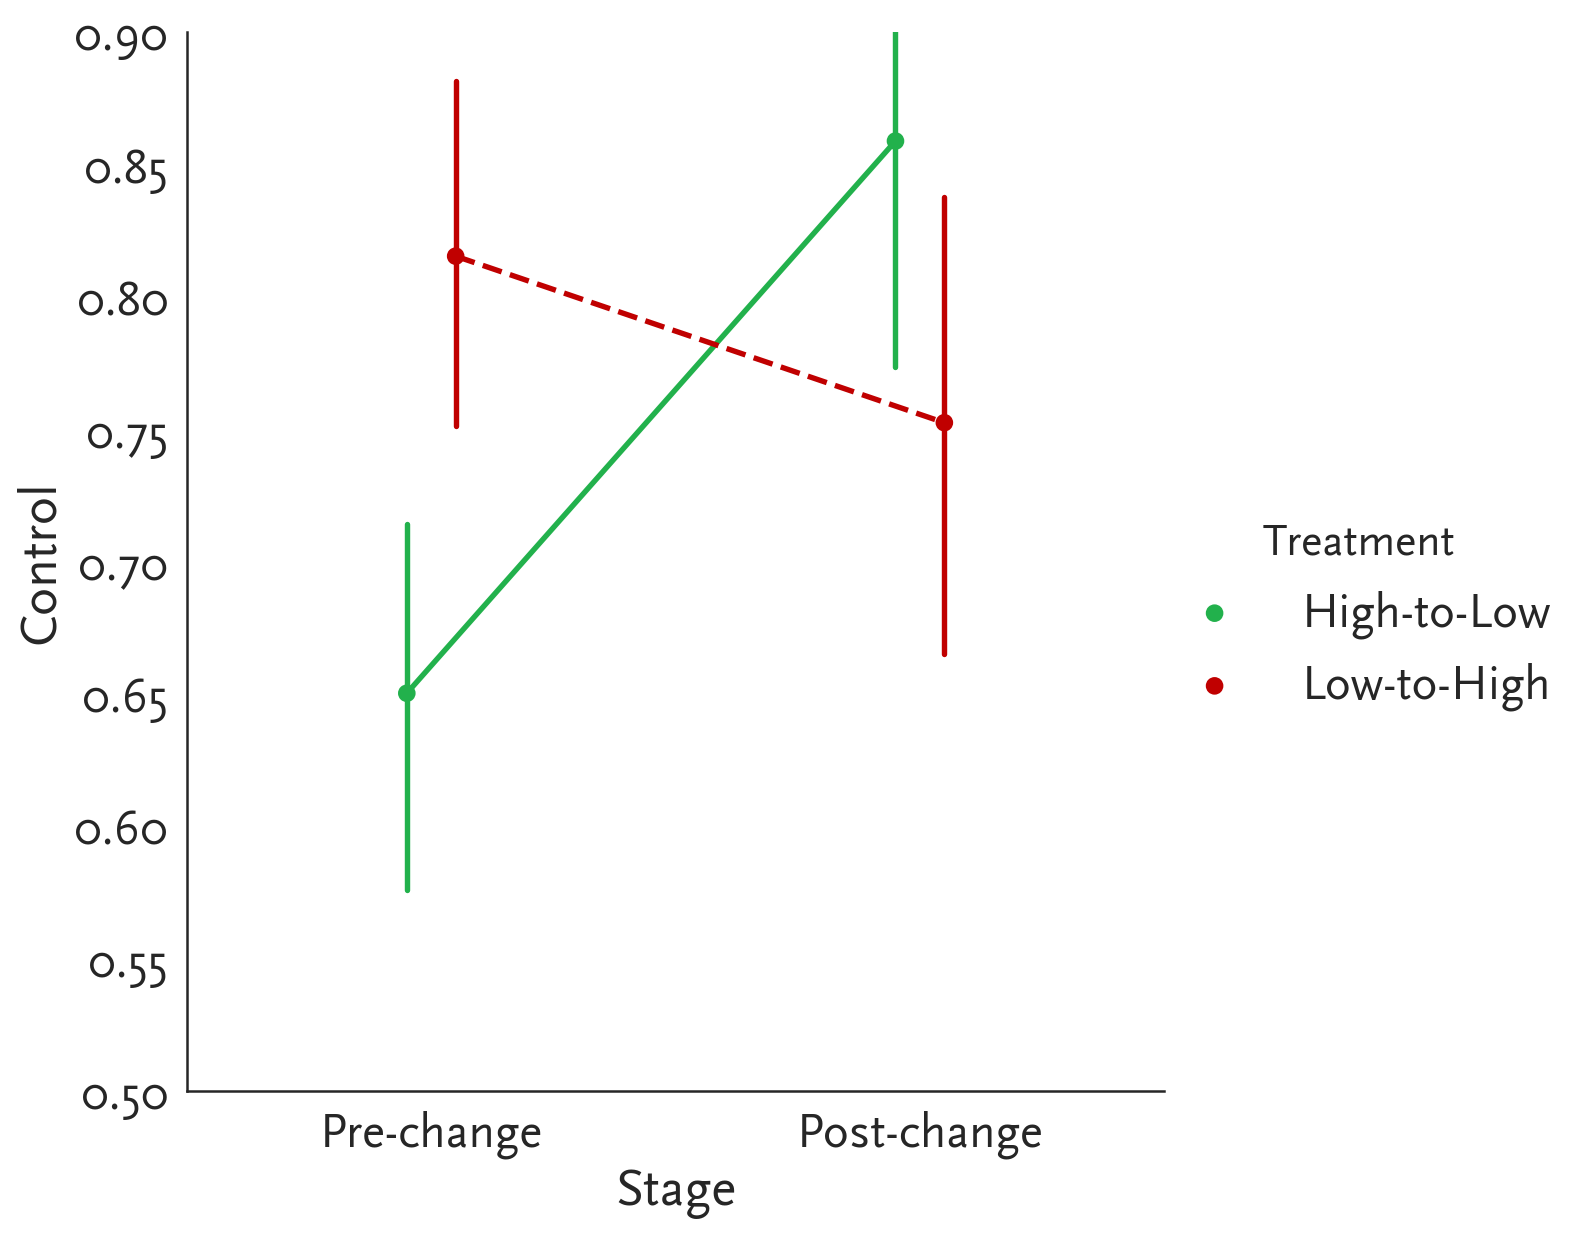

In [46]:
sns.set(font=['ScalaSans'], style="white", font_scale=1.8);
with sns.plotting_context("notebook", font_scale=2.2):
    g = sns.catplot(x="Stage", y="Control", hue="Treatment", ci=95, dodge=0.10, kind="point", data=dataPrin, palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], units="group(participantcode)", aspect=1, height=9)
    (g.set(ylim=(0.50, 0.9)))
#plt.savefig(r"3. Output\Period graph Low HI.png", dpi=600)

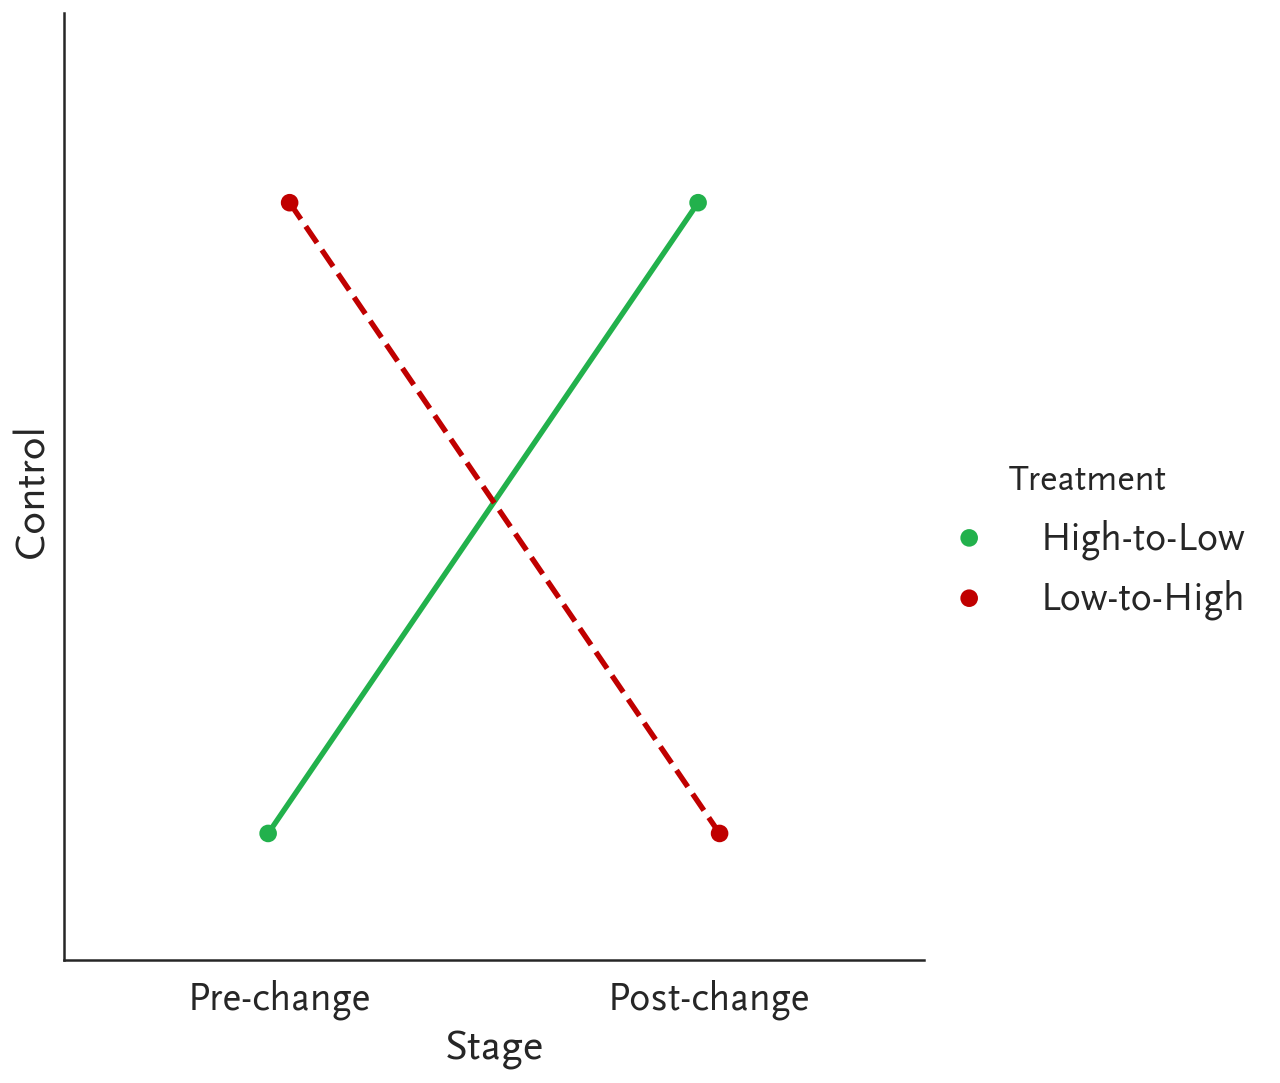

In [47]:
sns.set(font=['ScalaSans'], style="white", font_scale=1.8);
g=sns.catplot("Stage", "Control ", "Treatment", dataPrin, kind="point", order=["Pre-change", "Post-change"], palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], dodge=0.05, height=8, legend_out=True, units="group(participantcode)", ci=95);
(g.set(ylim=(0.60, 0.90), yticks=[]))
#plt.savefig(r"3. Output\Difference in difference predicted.png", dpi=600)

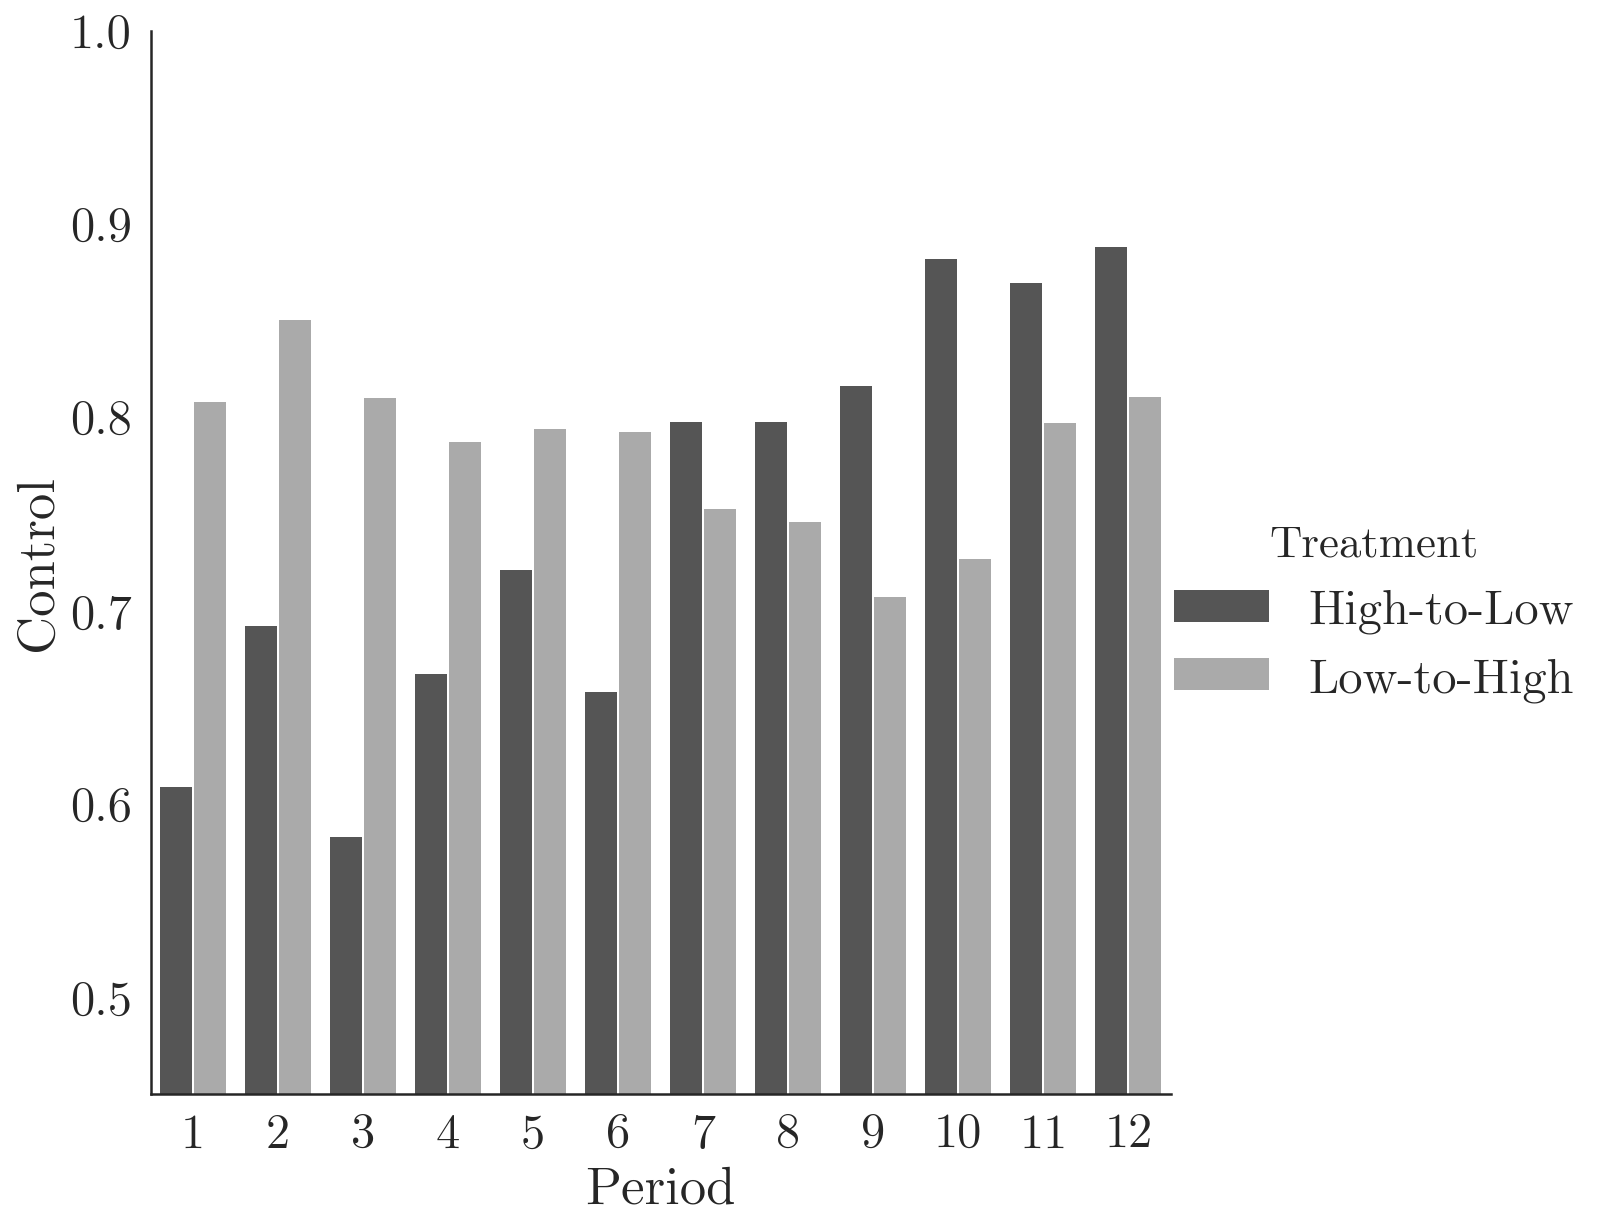

In [48]:
sns.set(font=['CMU Serif'], style="white", font_scale=1.8);
with sns.plotting_context("notebook", font_scale=2.2):
    g = sns.catplot(x="Period", y="Control", hue="Treatment", ci=None, dodge=0.10, kind="bar", data=dataPrin, palette="gray", aspect=1, height=9)
    (g.set(ylim=(0.45, 1.00)))
#plt.savefig(r"3. Output\Histogram black-white.png", dpi=600)

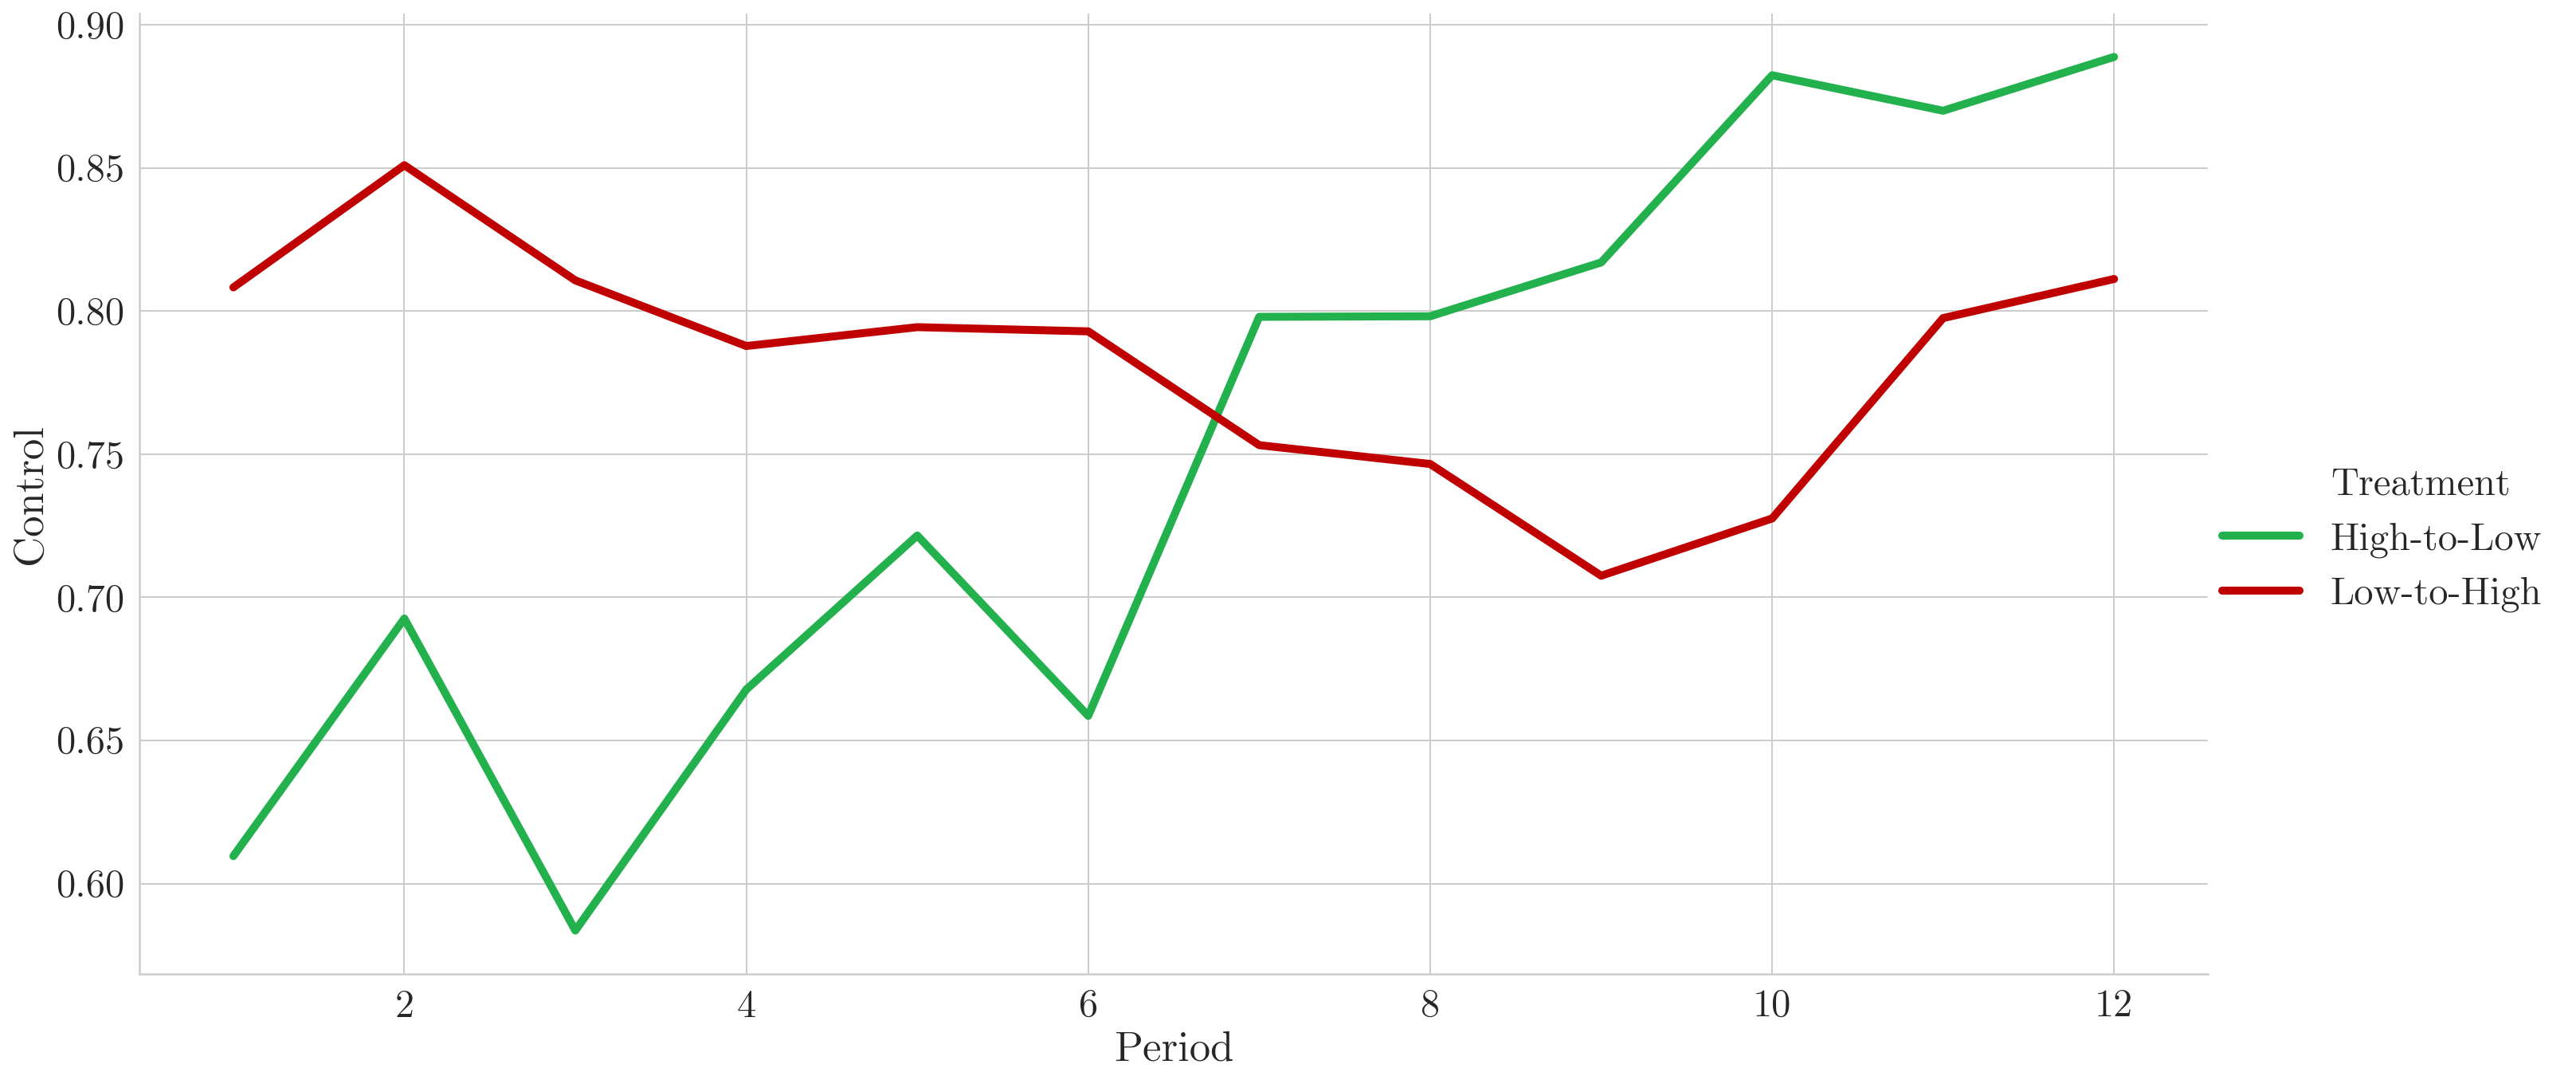

In [49]:
sns.set(font=['CMU Serif'], style="whitegrid", font_scale=1.8);
with sns.plotting_context("notebook", font_scale=2.2, rc={"lines.linewidth": 5}):
    sns.relplot(x="Period", y="Control", hue="Treatment", aspect=2, height=10, palette=sns.color_palette(flatui, n_colors=2), kind="line", data=dataPrin, ci=None);
    #plt.savefig(r"3. Output\timeline control.png", dpi=600)

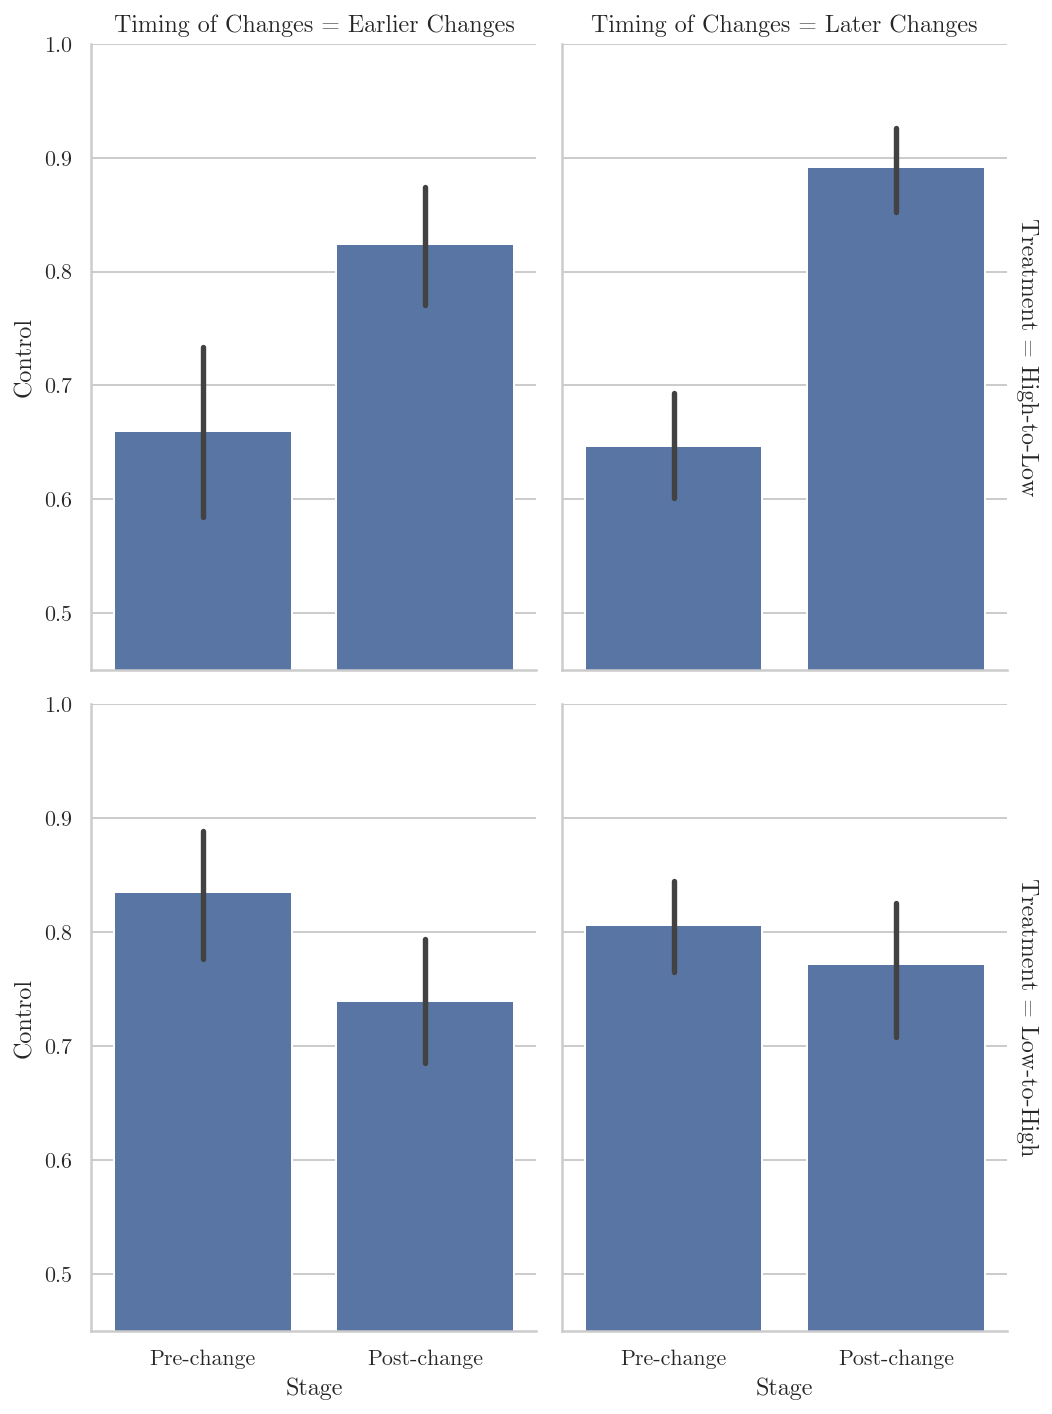

In [50]:
#sns.barplot(data=dataPrin, x="Stage", y="Control", col="Treatment")
sns.set(font=['CMU Serif'], style="whitegrid");
#with sns.plotting_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5}):
g = sns.FacetGrid(dataPrin, margin_titles=True, row="Treatment", ylim=(0.45, 1), col="Timing of Changes", height=5, aspect=0.75, palette=sns.color_palette(flatui, n_colors=2))
g.map(sns.barplot, "Stage", "Control");

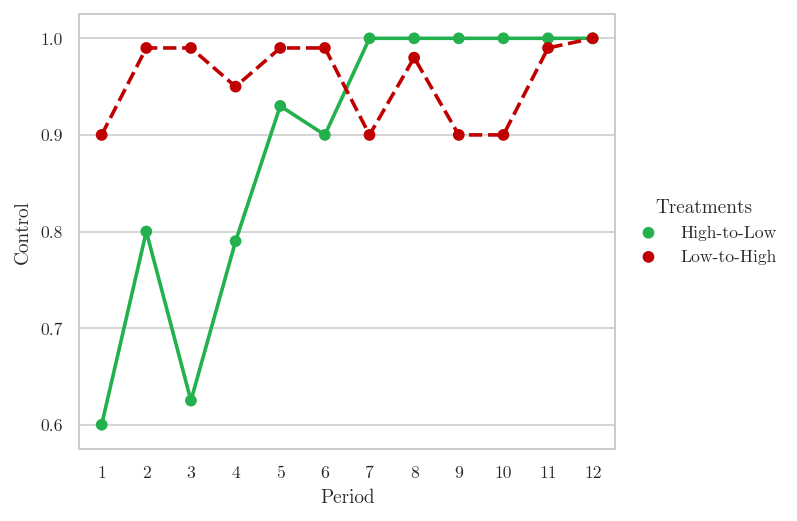

In [51]:
sns.set(font=['CMU Serif'], style="whitegrid");
with sns.plotting_context("paper", font_scale=1, rc={"lines.linewidth": 2.5}):
    s = sns.pointplot(data=dataPrin, estimator=median, x="Period", y="Control", hue="Treatment", scale=0.4, palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], ci=None);
    
    box = s.get_position()
    s.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    s.legend(loc='center left', title="Treatments", frameon=False, bbox_to_anchor=(1, 0.5))
    
    #plt.savefig(r"3. Output\timeline control.png", dpi=600);

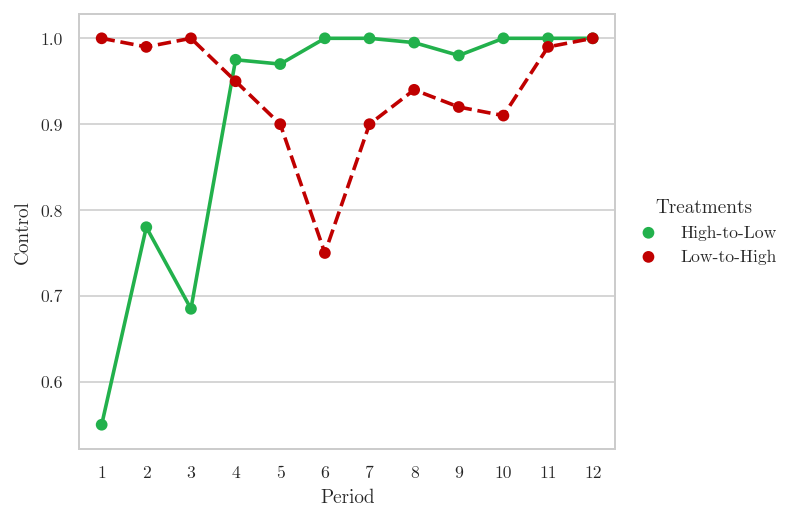

In [52]:
sns.set(font=['CMU Serif'], style="whitegrid");
with sns.plotting_context("paper", font_scale=1, rc={"lines.linewidth": 2.5}):
    s = sns.pointplot(data=dataPrinEarly, estimator=median, x="Period", y="Control", hue="Treatment", scale=0.4, palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], ci=None);
    box = s.get_position()
    s.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    s.legend(loc='center left', title="Treatments", frameon=False, bbox_to_anchor=(1, 0.5))
    #plt.savefig(r"3. Output\timeline control earlier.png", dpi=600);

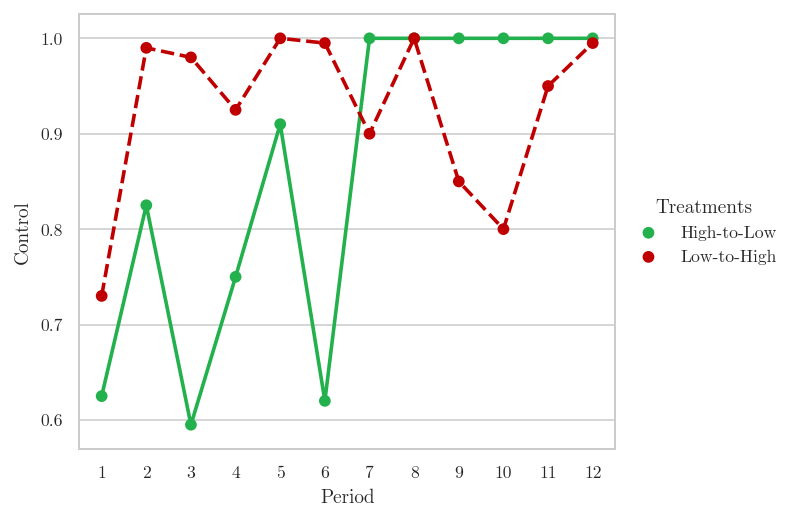

In [53]:
sns.set(font=['CMU Serif'], style="whitegrid");
with sns.plotting_context("paper", font_scale=1, rc={"lines.linewidth": 2.5}):
    s = sns.pointplot(data=dataPrinLate, estimator=median, x="Period", y="Control", hue="Treatment", scale=0.4, palette=sns.color_palette(flatui, n_colors=2), linestyles=["-", "--"], ci=None);
    box = s.get_position()
    s.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    s.legend(loc='center left', title="Treatments", frameon=False, bbox_to_anchor=(1, 0.5))
    #plt.savefig(r"3. Output\timeline control later.png", dpi=600);